In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [465]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [727]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder

In [120]:
train_df = pd.read_csv('train_final.csv')
train_df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P04485    KK Nagar      1724  22-08-2010            107        2.0   
1  P05764  Karapakkam      1623  26-12-2009            138        2.0   
2  P07500    Chrompet      1174  21-10-2008              8        1.0   
3  P06514    KK Nagar      1988  03-08-2009            169        3.0   
4  P00821    Chrompet       736  03-07-2013            143        1.0   

   N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL     ...      UTILITY_AVAIL  \
0         1.0       4  Normal Sale        Yes     ...            NoSewr    
1         2.0       4      Partial        Yes     ...            NoSewr    
2         1.0       3       Family         No     ...                ELO   
3         2.0       5  Normal Sale         No     ...             NoSeWa   
4         1.0       2     AbNormal         No     ...             NoSeWa   

   STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0   Paved     RH      4.5         4.7         4.0        4.36   503359   
1   Paved      I      2.0         4.8         2.4        3.00   317230   
2   Paved     RM      3.9         3.2         3.1        3.38   413176   
3  Gravel     RL      2.1         2.1         2.3        2.18   458664   
4  Gravel     RH      4.7         3.3         2.0        3.33   301939   

   COMMIS  SALES_PRICE  
0  133242     14804680  
1  190338      7930750  
2  159939     13328250  
3  217865     11466600  
4   94356      9435600  

[5 rows x 22 columns]

In [121]:
test_df = pd.read_csv('test_final.csv')
test_df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P04842  Anna Nagar      1532  20-06-2010            150        1.0   
1  P02216   Velachery      1538  13-11-2011            124        2.0   
2  P01666  Karapakkam       824  28-02-2012             62        1.0   
3  P00220  Anna Nagar      1885  11-09-2014            109        2.0   
4  P09713   Velachery      1727  02-01-2006             65        2.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL   ...     BUILDTYPE UTILITY_AVAIL  \
0         1.0       4   AdjLand        Yes   ...        Others           ELO   
1         1.0       4    Family         No   ...    Commercial       NoSewr    
2         1.0       2   AdjLand        Yes   ...         House       NoSewr    
3         1.0       5   Partial        Yes   ...         House       NoSewr    
4         1.0       4    Family         No   ...         House       NoSewr    

      STREET MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0  No Access     RH      4.5          3.8         2.7       3.605   424039   
1  No Access      C      2.9          4.3         4.8       4.100   411937   
2  No Access      I      3.8          4.5         4.3       4.210   231693   
3      Paved     RL      4.7          4.6         2.4       3.755   337535   
4     Gravel      A      4.3          4.8         4.7       4.650   293672   

   COMMIS  
0   58894  
1  167002  
2   88264  
3  162017  
4  146836  

[5 rows x 21 columns]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5331 entries, 0 to 5330
Data columns (total 22 columns):
PRT_ID           5331 non-null object
AREA             5331 non-null object
INT_SQFT         5331 non-null int64
DATE_SALE        5331 non-null object
DIST_MAINROAD    5331 non-null int64
N_BEDROOM        5330 non-null float64
N_BATHROOM       5327 non-null float64
N_ROOM           5331 non-null int64
SALE_COND        5331 non-null object
PARK_FACIL       5331 non-null object
DATE_BUILD       5331 non-null object
BUILDTYPE        5331 non-null object
UTILITY_AVAIL    5331 non-null object
STREET           5331 non-null object
MZZONE           5331 non-null object
QS_ROOMS         5331 non-null float64
QS_BATHROOM      5331 non-null float64
QS_BEDROOM       5331 non-null float64
QS_OVERALL       5290 non-null float64
REG_FEE          5331 non-null int64
COMMIS           5331 non-null int64
SALES_PRICE      5331 non-null int64
dtypes: float64(6), int64(6), object(10)
memory usage: 91

In [165]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 21 columns):
PRT_ID           1778 non-null object
AREA             1778 non-null object
INT_SQFT         1778 non-null int64
DATE_SALE        1778 non-null object
DIST_MAINROAD    1778 non-null int64
N_BEDROOM        1778 non-null float64
N_BATHROOM       1777 non-null float64
N_ROOM           1778 non-null int64
SALE_COND        1778 non-null object
PARK_FACIL       1778 non-null object
DATE_BUILD       1778 non-null object
BUILDTYPE        1778 non-null object
UTILITY_AVAIL    1778 non-null object
STREET           1778 non-null object
MZZONE           1778 non-null object
QS_ROOMS         1778 non-null float64
QS_BATHROOM      1778 non-null float64
QS_BEDROOM       1778 non-null float64
QS_OVERALL       1771 non-null float64
REG_FEE          1778 non-null int64
COMMIS           1778 non-null int64
dtypes: float64(6), int64(5), object(10)
memory usage: 291.8+ KB


In [5]:
train_df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  5331.000000    5331.000000  5330.000000  5327.000000  5331.000000   
mean   1380.416995      99.871131     1.632645     1.208936     3.687676   
std     455.166814      57.585529     0.796728     0.406586     1.011842   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     996.500000      50.000000     1.000000     1.000000     3.000000   
50%    1361.000000     100.000000     1.000000     1.000000     4.000000   
75%    1740.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  5331.000000  5331.000000  5331.000000  5290.000000    5331.000000   
mean      3.510392     3.500882     3.486775     3.499057  377719.492966   
std       0.891307     0.896774     0.887873     0.527665  143104.721395   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.120000  274357.000000   
50%       3.500000     3.500000     3.500000     3.500000  349796.000000   
75%       4.300000     4.300000     4.300000     3.880000  451428.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    5331.000000  5.331000e+03  
mean   141583.535172  1.091800e+07  
std     78608.520838  3.780626e+06  
min      5055.000000  2.156875e+06  
25%     84927.500000  8.297402e+06  
50%    128273.000000  1.035325e+07  
75%    185030.500000  1.298661e+07  
max    491961.000000  2.340786e+07

In [6]:
test_df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  1778.000000    1778.000000  1778.000000  1777.000000  1778.000000   
mean   1387.038245      98.799775     1.650169     1.226224     3.691789   
std     464.168225      56.861177     0.821217     0.418504     1.040838   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     987.000000      51.000000     1.000000     1.000000     3.000000   
50%    1413.500000      97.000000     1.000000     1.000000     4.000000   
75%    1758.750000     148.000000     2.000000     1.000000     4.000000   
max    2496.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  1778.000000  1778.000000  1778.000000  1771.000000    1778.000000   
mean      3.538695     3.526322     3.480877     3.515791  374596.161980   
std       0.893879     0.900987     0.885680     0.525849  142983.140364   
min       2.000000     2.000000     2.000000     2.060000   95798.000000   
25%       2.800000     2.700000     2.700000     3.150000  267084.000000   
50%       3.600000     3.500000     3.500000     3.530000  348655.000000   
75%       4.300000     4.300000     4.300000     3.897500  451804.250000   
max       5.000000     5.000000     5.000000     4.870000  981117.000000   

              COMMIS  
count    1778.000000  
mean   139273.275591  
std     79241.557411  
min      6149.000000  
25%     81899.500000  
50%    125507.500000  
75%    182494.750000  
max    495405.000000

### INFO::
#### There are total 22 columns(**SALES_PRICE**) with **PRT_ID** so considering only 21 columns
##### Categorical features (9) :: **INT_SQFT, DIST_MAINROAD, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE**
##### Ordinal features (12) :: **AREA, STREET, DATE_BUILD, PARK_FACIL, SALE_COND, MZZONE, UTILITY_AVAIL, BUILDTYPE, DATE_SALE, N_BEDROOM, N_BATHROOM, N_ROOM**
 
#### Out of which these seem Unecessary
- **PRT_ID** => no use
- Rest seems to be usefull and to be analyzed using plots

#### These are columns with missing values (Handle them by seeing their importance and how to impute them)
TRAINING
- **N_BEDROOM** => 1
- **N_BATHROOM** => 4
- **QS_OVERALL** => 41

TESTING
- **N_BATHROOM** => 1
- **QS_OVERALL** => 7

#### Training data => 5331
#### Testing data => 1778

#### Things noted from **describe**
- Draw boxplot of w.r.t **N_BEDROOM** and see how many rooms have 4 bedrooms and its relation with **SALES_PRICE**. **N_BEDROOM** has fewer bedrooms with value **4**.
- How **SALES_PRICE** depends on **DIST_MAINROAD** i.e. having distance **200** is significant to affect **SALES_PRICE** by much. **DIST_MAINROOD** is well distributed.

In [7]:
ordinal_columns = list(set(train_df._get_numeric_data().columns) - set(['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']))
categorical_columns = list(set(train_df.columns) - set(ordinal_columns) - set(['PRT_ID']))

In [8]:
categorical_columns, len(categorical_columns)

(['UTILITY_AVAIL',
  'STREET',
  'SALE_COND',
  'N_BEDROOM',
  'N_BATHROOM',
  'N_ROOM',
  'PARK_FACIL',
  'AREA',
  'BUILDTYPE',
  'MZZONE',
  'DATE_BUILD',
  'DATE_SALE'],
 12)

In [9]:
ordinal_columns, len(ordinal_columns)

(['QS_BEDROOM',
  'QS_BATHROOM',
  'REG_FEE',
  'SALES_PRICE',
  'QS_ROOMS',
  'COMMIS',
  'INT_SQFT',
  'QS_OVERALL',
  'DIST_MAINROAD'],
 9)

In [197]:
for col in categorical_columns:
    if col in ['SALES_PRICE', 'PRT_ID', 'DATE_BUILD', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM']:
        continue
    print(col, np.array_equal(np.sort(train_df[col].unique()), np.sort(test_df[col].unique())))

UTILITY_AVAIL True
STREET True
SALE_COND True
N_ROOM True
PARK_FACIL True
AREA True
BUILDTYPE True
MZZONE True


### Things noted
Error in col values =>
- UTILTY_AVAIL
- AREA
- SALE_COND
- PARK_FACIL

In [246]:
col = 'BUILDTYPE'

In [259]:
np.sort(train_df[col].unique()), len(np.sort(train_df[col].unique()))

(array(['Commercial', 'House', 'Others'], dtype=object), 3)

In [260]:
np.sort(test_df[col].unique()), len(np.sort(test_df[col].unique()))

(array(['Commercial', 'House', 'Others'], dtype=object), 3)

In [261]:
np.array_equal(np.sort(train_df[col].unique()), np.sort(test_df[col].unique()))

True

In [262]:
test_df[test_df.loc[:, col] == 'Comercial']

Empty DataFrame
Columns: [PRT_ID, AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS]
Index: []

[0 rows x 21 columns]

### Correcting Data

In [116]:
def replace_col_values(df, column, original, replace, test_df = None, test = False):
    for idx in df[df.loc[:, column] == original].index:
        df.loc[idx, column] = replace
    
    if test and test_df is not None:
        for idx in test_df[test_df.loc[:, column] == original].index:
            test_df.loc[idx, column] = replace

In [122]:
replace_col_values(train_df, 'UTILITY_AVAIL', 'All Pub', 'AllPub')

In [123]:
replace_col_values(train_df, 'UTILITY_AVAIL', 'NoSewr ', 'NoSewr')

In [124]:
replace_col_values(test_df, 'UTILITY_AVAIL', 'NoSewr ', 'NoSewr')

In [125]:
replace_col_values(test_df, 'AREA', 'Adyr', 'Adyar')

In [126]:
replace_col_values(train_df, 'AREA', 'Ana Nagar', 'Anna Nagar')

In [127]:
replace_col_values(train_df, 'AREA', 'Ann Nagar', 'Anna Nagar')

In [128]:
replace_col_values(train_df, 'AREA', 'Chormpet', 'Chrompet', test_df = test_df, test = True)

In [129]:
replace_col_values(train_df, 'AREA', 'Chrmpet', 'Chrompet', test_df = test_df, test = True)

In [130]:
replace_col_values(train_df, 'AREA', 'Chormpt', 'Chrompet', test_df = test_df, test = True)

In [137]:
replace_col_values(train_df, 'AREA', 'Chrompt', 'Chrompet', test_df = test_df, test = True)

In [140]:
replace_col_values(train_df, 'AREA', 'KKNagar', 'KK Nagar')

In [145]:
replace_col_values(train_df, 'AREA', 'TNagar', 'T Nagar', test_df = test_df, test = True)

In [149]:
replace_col_values(train_df, 'AREA', 'Velchery', 'Velachery', test_df = test_df, test = True)

In [153]:
replace_col_values(train_df, 'AREA', 'Karapakam', 'Karapakkam', test_df = test_df, test = True)

In [170]:
replace_col_values(train_df, 'PARK_FACIL', 'Noo', 'No')

In [189]:
replace_col_values(train_df, 'SALE_COND', 'Ab Normal', 'AbNormal', test_df = test_df, test = True)

In [193]:
replace_col_values(train_df, 'SALE_COND', 'Adj Land', 'AdjLand', test_df = test_df, test = True)

In [181]:
replace_col_values(train_df, 'SALE_COND', 'Partiall', 'Partial')

In [184]:
replace_col_values(test_df, 'SALE_COND', 'PartiaLl', 'Partial')

In [185]:
replace_col_values(test_df, 'SALE_COND', 'Partiall', 'Partial')

In [218]:
replace_col_values(train_df, 'STREET', 'NoAccess', 'No Access', test_df = test_df, test = True)

In [222]:
replace_col_values(train_df, 'STREET', 'Pavd', 'Paved', test_df = test_df, test = True)

In [254]:
replace_col_values(train_df, 'BUILDTYPE', 'Other', 'Others', test_df = test_df, test = True)

In [258]:
replace_col_values(train_df, 'BUILDTYPE', 'Comercial', 'Commercial', test_df = test_df, test = True)

### Saving Corrected data

In [263]:
train_df.to_csv('train_corrected.csv', index = False)
test_df.to_csv('test_corrected.csv', index = False)

In [264]:
train_corrected_df = pd.read_csv('train_corrected.csv')
train_corrected_df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P04485    KK Nagar      1724  22-08-2010            107        2.0   
1  P05764  Karapakkam      1623  26-12-2009            138        2.0   
2  P07500    Chrompet      1174  21-10-2008              8        1.0   
3  P06514    KK Nagar      1988  03-08-2009            169        3.0   
4  P00821    Chrompet       736  03-07-2013            143        1.0   

   N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL     ...      UTILITY_AVAIL  \
0         1.0       4  Normal Sale        Yes     ...             NoSewr   
1         2.0       4      Partial        Yes     ...             NoSewr   
2         1.0       3       Family         No     ...                ELO   
3         2.0       5  Normal Sale         No     ...             NoSeWa   
4         1.0       2     AbNormal         No     ...             NoSeWa   

   STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0   Paved     RH      4.5         4.7         4.0        4.36   503359   
1   Paved      I      2.0         4.8         2.4        3.00   317230   
2   Paved     RM      3.9         3.2         3.1        3.38   413176   
3  Gravel     RL      2.1         2.1         2.3        2.18   458664   
4  Gravel     RH      4.7         3.3         2.0        3.33   301939   

   COMMIS  SALES_PRICE  
0  133242     14804680  
1  190338      7930750  
2  159939     13328250  
3  217865     11466600  
4   94356      9435600  

[5 rows x 22 columns]

In [265]:
test_corrected_df = pd.read_csv('test_corrected.csv')
test_corrected_df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P04842  Anna Nagar      1532  20-06-2010            150        1.0   
1  P02216   Velachery      1538  13-11-2011            124        2.0   
2  P01666  Karapakkam       824  28-02-2012             62        1.0   
3  P00220  Anna Nagar      1885  11-09-2014            109        2.0   
4  P09713   Velachery      1727  02-01-2006             65        2.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL   ...     BUILDTYPE UTILITY_AVAIL  \
0         1.0       4   AdjLand        Yes   ...        Others           ELO   
1         1.0       4    Family         No   ...    Commercial        NoSewr   
2         1.0       2   AdjLand        Yes   ...         House        NoSewr   
3         1.0       5   Partial        Yes   ...         House        NoSewr   
4         1.0       4    Family         No   ...         House        NoSewr   

      STREET MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0  No Access     RH      4.5          3.8         2.7       3.605   424039   
1  No Access      C      2.9          4.3         4.8       4.100   411937   
2  No Access      I      3.8          4.5         4.3       4.210   231693   
3      Paved     RL      4.7          4.6         2.4       3.755   337535   
4     Gravel      A      4.3          4.8         4.7       4.650   293672   

   COMMIS  
0   58894  
1  167002  
2   88264  
3  162017  
4  146836  

[5 rows x 21 columns]

In [266]:
for col in categorical_columns:
    if col in ['SALES_PRICE', 'PRT_ID', 'DATE_BUILD', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM']:
        continue
    print(col, np.array_equal(np.sort(train_corrected_df[col].unique()), np.sort(test_corrected_df[col].unique())))

UTILITY_AVAIL True
STREET True
SALE_COND True
N_ROOM True
PARK_FACIL True
AREA True
BUILDTYPE True
MZZONE True


### Imputing Missing Values

#### These are columns with missing values (Handle them by seeing their importance and how to impute them)
TRAINING
- **N_BEDROOM** => 1
- **N_BATHROOM** => 4
- **QS_OVERALL** => 41

TESTING
- **N_BATHROOM** => 1
- **QS_OVERALL** => 7

In [586]:
train_corrected_df['N_BEDROOM'].fillna(0, inplace = True);
train_corrected_df['N_BATHROOM'].fillna(0, inplace = True);
test_corrected_df['N_BATHROOM'].fillna(0, inplace = True);

In [602]:
all_data = pd.concat((train_corrected_df, test_corrected_df), sort = False, ignore_index = True)
all_data.drop(columns = ['SALES_PRICE'], inplace = True)
all_data.shape

(7109, 21)

In [603]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
QS_OVERALL         0.6752

Text(0.5,1,'Percent missing data by feature')

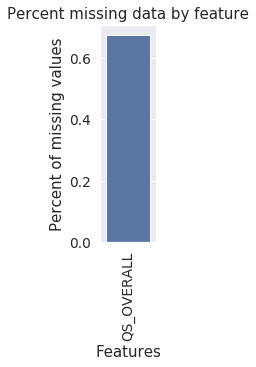

In [604]:
f, ax = plt.subplots(figsize = (1, 4))
plt.xticks(rotation = '90')
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percent of missing values', fontsize = 15)
plt.title('Percent missing data by feature', fontsize = 15)

#### Impute by going one-by-one with features

* QS_OVERALL

#### QS_OVERALL is highly correlated to QS_ROOMS, QS_BATHROOM, QS_BEDROOM  so can use NN to predict it

In [609]:
all_data.columns[15: 18]

Index(['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM'], dtype='object')

In [610]:
all_data.columns[18]

'QS_OVERALL'

In [615]:
X = all_data.dropna()[all_data.columns[15 : 18]]
y = np.expand_dims(all_data.dropna()[all_data.columns[18]], axis = 1)

In [616]:
X.shape, y.shape

((7061, 3), (7061, 1))

In [621]:
all_data['QS_OVERALL'].describe()

count    7061.000000
mean        3.503254
std         0.527223
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [646]:
svm = SVR()
svm.fit(X, y)
pred = svm.predict(X)
r2_score(y, pred)

/home/akash/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9651036543672821

In [655]:
null_df = train_corrected_df[train_corrected_df['QS_OVERALL'].isnull()]
X = null_df[null_df.columns[15 : 18]]

In [661]:
train_corrected_df.loc[null_df.index, 'QS_OVERALL'] = svm.predict(X)

In [663]:
null_df = test_corrected_df[test_corrected_df['QS_OVERALL'].isnull()]
X = null_df[null_df.columns[15 : 18]]

In [665]:
test_corrected_df.loc[null_df.index, 'QS_OVERALL'] = svm.predict(X)

In [666]:
all_data = pd.concat((train_corrected_df, test_corrected_df), sort = False, ignore_index = True)
all_data.drop(columns = ['SALES_PRICE'], inplace = True)
all_data.shape

(7109, 21)

In [667]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [668]:
train_corrected_df.to_csv('train_corrected_imputed.csv', index = False)
test_corrected_df.to_csv('test_corrected_imputed.csv', index = False)

In [697]:
train_corrected_df['DATE_DIFF'] = train_corrected_df.apply(lambda x : int(str(x['DATE_SALE']).split('-')[-1]) - int(str(x['DATE_BUILD']).split('-')[-1]), axis = 1)

In [699]:
test_corrected_df['DATE_DIFF'] = test_corrected_df.apply(lambda x : int(str(x['DATE_SALE']).split('-')[-1]) - int(str(x['DATE_BUILD']).split('-')[-1]), axis = 1)

In [703]:
train_corrected_df.dtypes

PRT_ID               object
AREA                 object
INT_SQFT              int64
DATE_SALE            object
DIST_MAINROAD         int64
N_BEDROOM           float64
N_BATHROOM          float64
N_ROOM                int64
SALE_COND            object
PARK_FACIL           object
DATE_BUILD           object
BUILDTYPE            object
UTILITY_AVAIL        object
STREET               object
MZZONE               object
QS_ROOMS            float64
QS_BATHROOM         float64
QS_BEDROOM          float64
QS_OVERALL          float64
REG_FEE               int64
COMMIS                int64
SALES_PRICE           int64
SALES_PRICE_NORM    float64
DATE_DIFF             int64
dtype: object

In [709]:
train_corrected_df.to_csv('train_corrected_imputed_date.csv', index = False)
test_corrected_df.to_csv('test_corrected_imputed_date.csv', index = False)

## Analyzing sales price

In [10]:
sns.set_style('whitegrid')

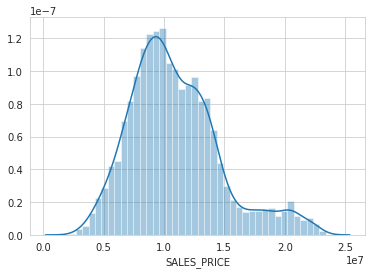

In [205]:
sns.distplot(train_corrected_df['SALES_PRICE'])

### Target Variable


 mu = 10917999.48 and sigma = 3780271.27



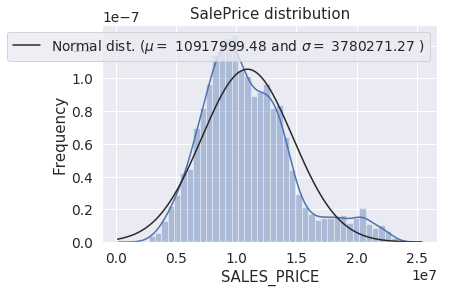

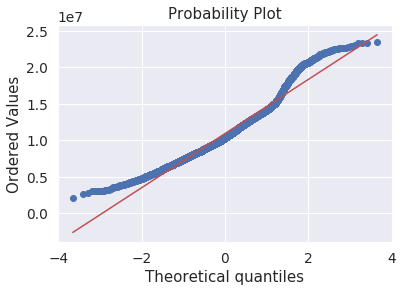

In [472]:
sns.distplot(train_corrected_df['SALES_PRICE'] , fit = norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_corrected_df['SALES_PRICE'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_corrected_df['SALES_PRICE'], plot = plt)
plt.show()

In [518]:
print("Skewness: %f" % train_corrected_df['SALES_PRICE'].skew())
print("Kurtosis: %f" % train_corrected_df['SALES_PRICE'].kurt())

Skewness: 0.794358
Kurtosis: 0.629776


### The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.


 mu = 16.33 and sigma = 0.29



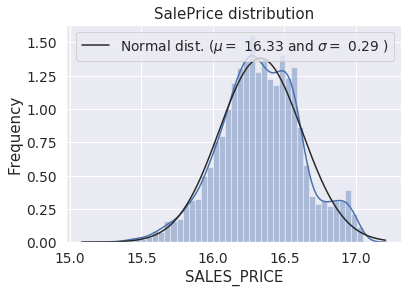

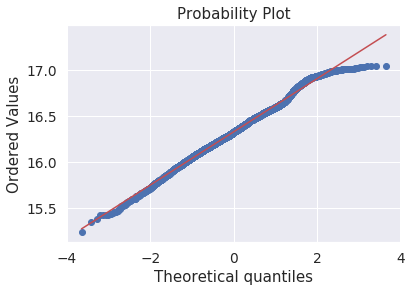

In [516]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
tmp = np.log1p(train_corrected_df['SALES_PRICE'] + 2000000)

#Check the new distribution 
sns.distplot(tmp , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(tmp)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)
plt.show()

In [517]:
print("Skewness: %f" % tmp.skew())
print("Kurtosis: %f" % tmp.kurt())

Skewness: -0.053577
Kurtosis: 0.063103


In [519]:
train_corrected_df['SALES_PRICE_NORM'] = tmp

In [520]:
train_corrected_df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P04485    KK Nagar      1724  22-08-2010            107        2.0   
1  P05764  Karapakkam      1623  26-12-2009            138        2.0   
2  P07500    Chrompet      1174  21-10-2008              8        1.0   
3  P06514    KK Nagar      1988  03-08-2009            169        3.0   
4  P00821    Chrompet       736  03-07-2013            143        1.0   

   N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL        ...         STREET  \
0         1.0       4  Normal Sale        Yes        ...          Paved   
1         2.0       4      Partial        Yes        ...          Paved   
2         1.0       3       Family         No        ...          Paved   
3         2.0       5  Normal Sale         No        ...         Gravel   
4         1.0       2     AbNormal         No        ...         Gravel   

  MZZONE QS_ROOMS QS_BATHROOM QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
0     RH      4.5         4.7        4.0        4.36   503359  133242   
1      I      2.0         4.8        2.4        3.00   317230  190338   
2     RM      3.9         3.2        3.1        3.38   413176  159939   
3     RL      2.1         2.1        2.3        2.18   458664  217865   
4     RH      4.7         3.3        2.0        3.33   301939   94356   

   SALES_PRICE  SALES_PRICE_NORM  
0     14804680         16.637168  
1      7930750         16.111147  
2     13328250         16.545208  
3     11466600         16.415723  
4      9435600         16.252242  

[5 rows x 23 columns]

### INFO
- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

## TASK TO ME :: 
- What is kurtosis
- What is Skewness

In [206]:
print("Skewness: %f" % train_corrected_df['SALES_PRICE'].skew())
print("Kurtosis: %f" % train_corrected_df['SALES_PRICE'].kurt())

Skewness: 0.794358
Kurtosis: 0.629776


## Analyzing categorical features

In [285]:
def plot_categorical_alone(df, column, test_df = None, plot_train = True, plot_test = False, annotate = True, ax = None):
    if ax is None:
        fig = plt.figure(figsize = (5, 5))
    
    if plot_train:
        ax1 = sns.countplot(df[column], ax = ax)
        total = len(df)
    
    if plot_test and test_df is not None:
        ax2 = sns.countplot(test_df[column], ax = ax)
        total1 = len(test_df)
    
    if annotate:
        if plot_train:
            for p in ax1.patches:
                ax1.annotate('{} / {:d}, {:.2f}%'.format(p.get_height(), int(total), p.get_height() * 100 / total), (p.get_x() - 0.1, p.get_height() + 1))
        
        if plot_test and test_df is not None:
            for p in ax2.patches:
                ax2.annotate('{} / {:d}, {:.2f}%'.format(p.get_height(), int(total1), p.get_height() * 100 / total1), (p.get_x() - 0.1, p.get_height() + 0.5))

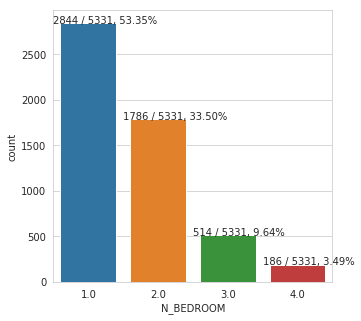

In [207]:
plot_categorical_alone(train_corrected_df, 'N_BEDROOM', plot_train = True, test_df = test_corrected_df, plot_test = False)

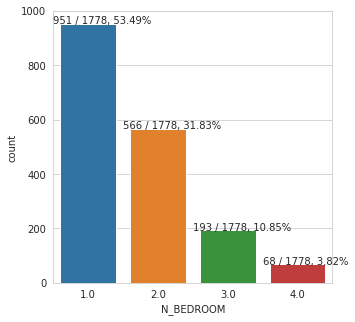

In [208]:
plot_categorical_alone(train_corrected_df, 'N_BEDROOM', plot_train = False, test_df = test_corrected_df, plot_test = True)

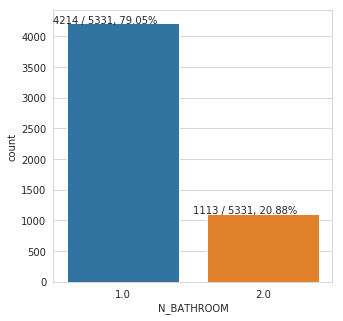

In [233]:
plot_categorical_alone(train_corrected_df, 'N_BATHROOM', plot_train = True, test_df = test_corrected_df, plot_test = False)

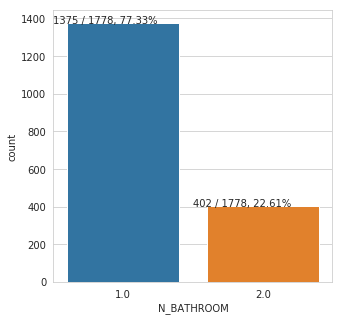

In [234]:
plot_categorical_alone(train_corrected_df, 'N_BATHROOM', plot_train = False, test_df = test_corrected_df, plot_test = True)

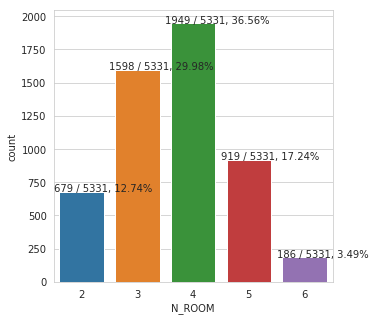

In [235]:
plot_categorical_alone(train_corrected_df, 'N_ROOM', plot_train = True, test_df = test_corrected_df, plot_test = False)

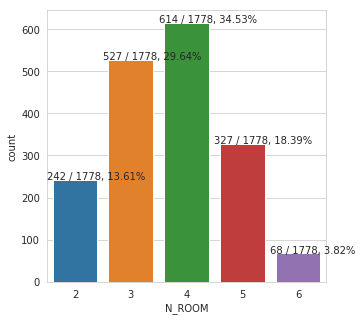

In [236]:
plot_categorical_alone(train_corrected_df, 'N_ROOM', plot_train = False, test_df = test_corrected_df, plot_test = True)

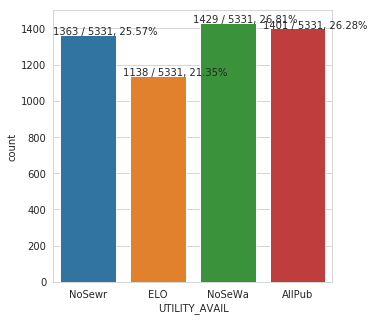

In [209]:
plot_categorical_alone(train_corrected_df, 'UTILITY_AVAIL', plot_train = True, test_df = test_corrected_df, plot_test = False)

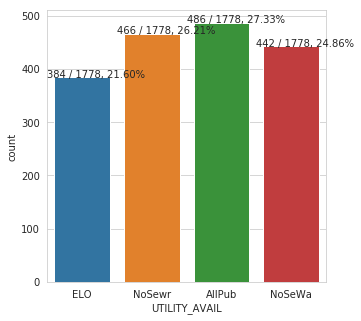

In [211]:
plot_categorical_alone(train_corrected_df, 'UTILITY_AVAIL', plot_train = False, test_df = test_corrected_df, plot_test = True)

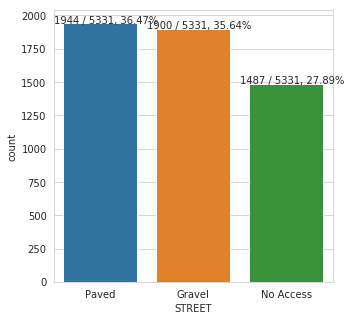

In [229]:
plot_categorical_alone(train_corrected_df, 'STREET', plot_train = True, test_df = test_corrected_df, plot_test = False)

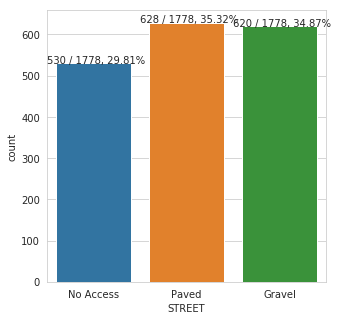

In [230]:
plot_categorical_alone(train_corrected_df, 'STREET', plot_train = False, test_df = test_corrected_df, plot_test = True)

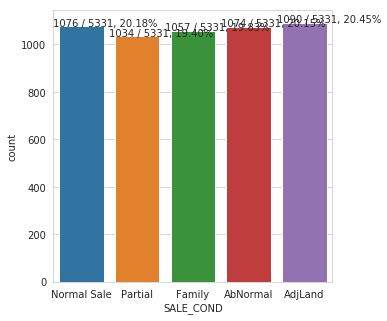

In [231]:
plot_categorical_alone(train_corrected_df, 'SALE_COND', plot_train = True, test_df = test_corrected_df, plot_test = False)

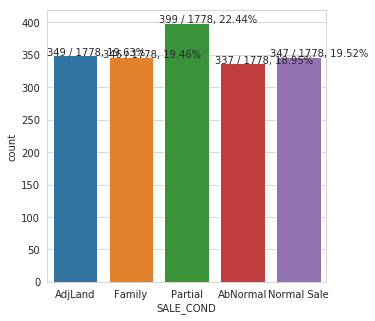

In [232]:
plot_categorical_alone(train_corrected_df, 'SALE_COND', plot_train = False, test_df = test_corrected_df, plot_test = True)

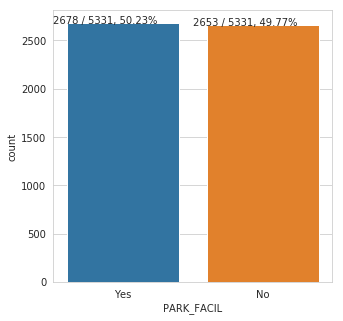

In [237]:
plot_categorical_alone(train_corrected_df, 'PARK_FACIL', plot_train = True, test_df = test_corrected_df, plot_test = False)

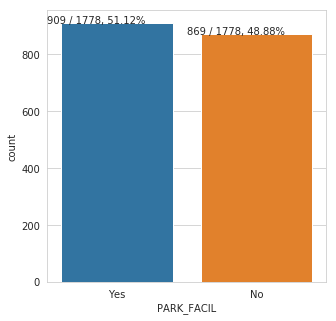

In [238]:
plot_categorical_alone(train_corrected_df, 'PARK_FACIL', plot_train = False, test_df = test_corrected_df, plot_test = True)

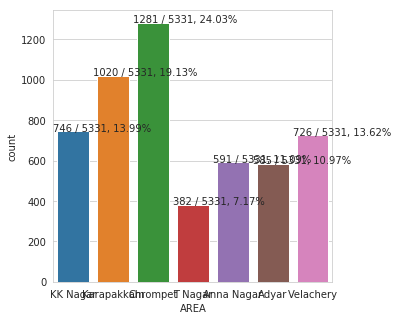

In [239]:
plot_categorical_alone(train_corrected_df, 'AREA', plot_train = True, test_df = test_corrected_df, plot_test = False)

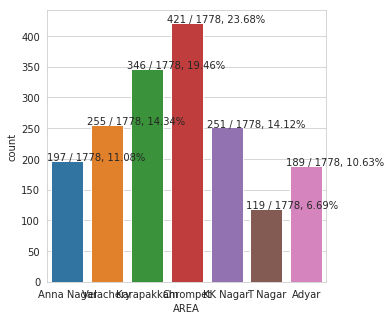

In [240]:
plot_categorical_alone(train_corrected_df, 'AREA', plot_train = False, test_df = test_corrected_df, plot_test = True)

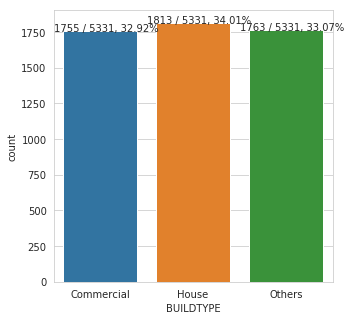

In [267]:
plot_categorical_alone(train_corrected_df, 'BUILDTYPE', plot_train = True, test_df = test_corrected_df, plot_test = False)

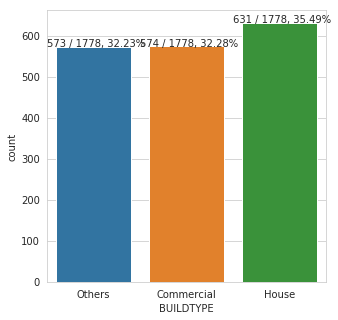

In [268]:
plot_categorical_alone(train_corrected_df, 'BUILDTYPE', plot_train = False, test_df = test_corrected_df, plot_test = True)

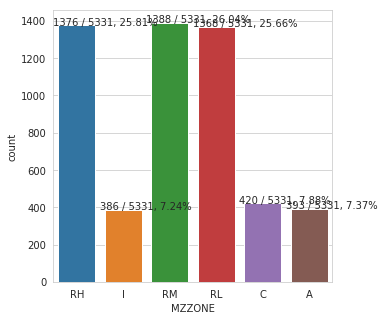

In [244]:
plot_categorical_alone(train_corrected_df, 'MZZONE', plot_train = True, test_df = test_corrected_df, plot_test = False)

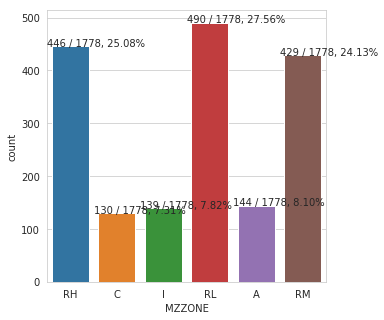

In [245]:
plot_categorical_alone(train_corrected_df, 'MZZONE', plot_train = False, test_df = test_corrected_df, plot_test = True)

### Columns with unequal distribution ::
- N_BEDROOM
- N_BATHROOM
- N_ROOM
- AREA
- MZZONE

## Task For me
See what can be done ::
- Suppose if a **column** has high correlation with **sales price**, then can make equal distribution by adding examples of less value in that column

## Analyzing numerical variables

In [281]:
def plot_numerical_alone(df, column, test_df = None, plot_train = True, plot_test = False, vertical = False, ax = None):
    if ax is None:
        fig = plt.figure(figsize = (5, 5))
    
    orient = 'h'
    if vertical:
        orient = 'v'
    
    if plot_train:
        sns.boxplot(df[column], ax = ax, orient = orient)
    
    if plot_test and test_df is not None:
        sns.boxplot(test_df[column], ax = ax, orient = orient)

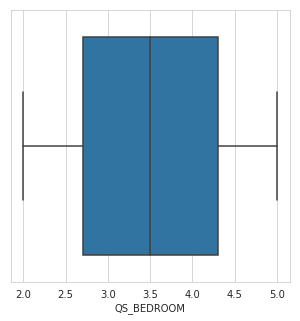

In [287]:
plot_numerical_alone(train_corrected_df, 'QS_BEDROOM', plot_train = True, test_df = test_corrected_df, plot_test = False)

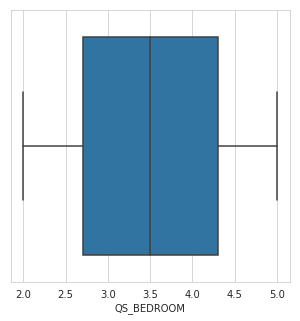

In [288]:
plot_numerical_alone(train_corrected_df, 'QS_BEDROOM', plot_train = False, test_df = test_corrected_df, plot_test = True)

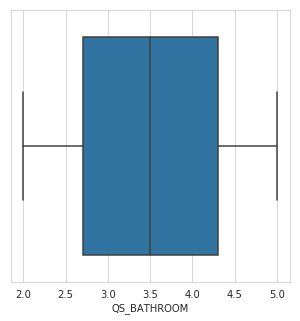

In [292]:
plot_numerical_alone(train_corrected_df, 'QS_BATHROOM', plot_train = True, test_df = test_corrected_df, plot_test = False)

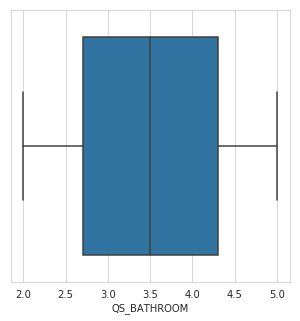

In [293]:
plot_numerical_alone(train_corrected_df, 'QS_BATHROOM', plot_train = False, test_df = test_corrected_df, plot_test = True)

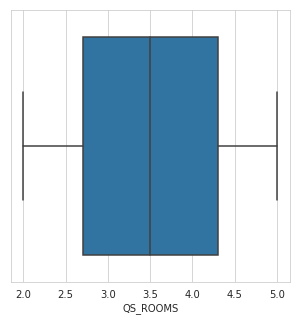

In [299]:
plot_numerical_alone(train_corrected_df, 'QS_ROOMS', plot_train = True, test_df = test_corrected_df, plot_test = False)

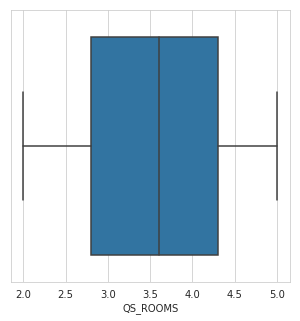

In [300]:
plot_numerical_alone(train_corrected_df, 'QS_ROOMS', plot_train = False, test_df = test_corrected_df, plot_test = True)

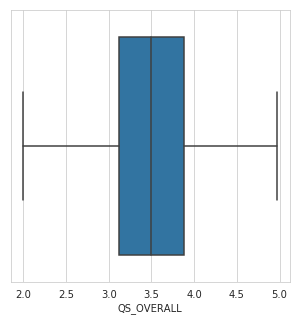

In [303]:
plot_numerical_alone(train_corrected_df, 'QS_OVERALL', plot_train = True, test_df = test_corrected_df, plot_test = False)

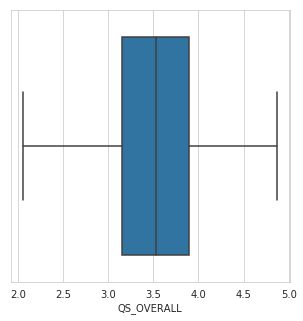

In [304]:
plot_numerical_alone(train_corrected_df, 'QS_OVERALL', plot_train = False, test_df = test_corrected_df, plot_test = True)

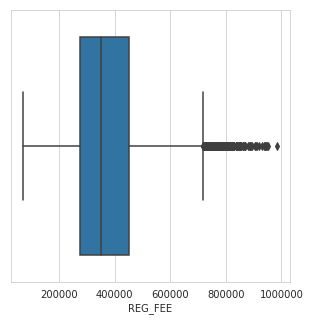

In [294]:
plot_numerical_alone(train_corrected_df, 'REG_FEE', plot_train = True, test_df = test_corrected_df, plot_test = False)

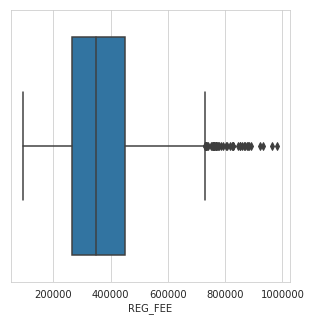

In [295]:
plot_numerical_alone(train_corrected_df, 'REG_FEE', plot_train = False, test_df = test_corrected_df, plot_test = True)

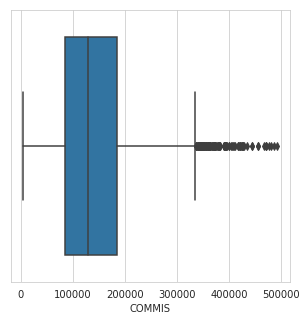

In [301]:
plot_numerical_alone(train_corrected_df, 'COMMIS', plot_train = True, test_df = test_corrected_df, plot_test = False)

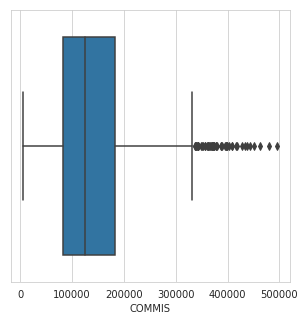

In [302]:
plot_numerical_alone(train_corrected_df, 'COMMIS', plot_train = False, test_df = test_corrected_df, plot_test = True)

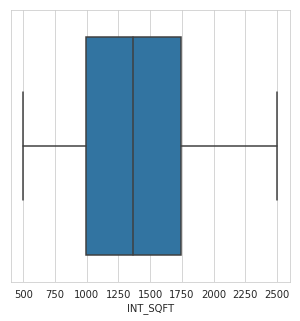

In [305]:
plot_numerical_alone(train_corrected_df, 'INT_SQFT', plot_train = True, test_df = test_corrected_df, plot_test = False)

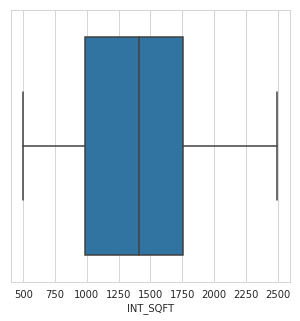

In [306]:
plot_numerical_alone(train_corrected_df, 'INT_SQFT', plot_train = False, test_df = test_corrected_df, plot_test = True)

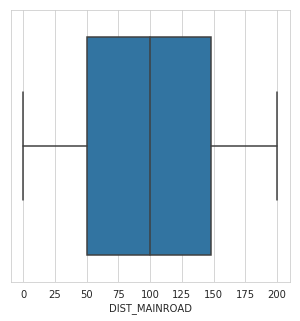

In [307]:
plot_numerical_alone(train_corrected_df, 'DIST_MAINROAD', plot_train = True, test_df = test_corrected_df, plot_test = False)

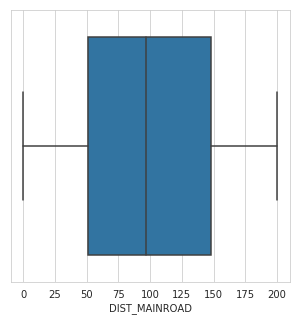

In [308]:
plot_numerical_alone(train_corrected_df, 'DIST_MAINROAD', plot_train = False, test_df = test_corrected_df, plot_test = True)

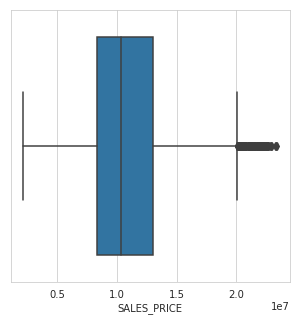

In [296]:
plot_numerical_alone(train_corrected_df, 'SALES_PRICE', plot_train = True, test_df = test_corrected_df, plot_test = False)

### INFO
#### These columns are not showing linear nature
* REG_FEE
* COMMIS

#### Categorical Columns with unequal distribution ::
- N_BEDROOM
- N_BATHROOM
- N_ROOM
- AREA
- MZZONE

## Task For me
See what can be done ::
- Suppose if a **column** has high correlation with **sales price**, then can make equal distribution by adding examples of less value in that column

In [413]:
def plot_x_y(df, x, y, z = None, plot_type = 'a', test_df = None, plot_train = True, plot_test = False, ax = None, alpha = 0.5):
    fig = plt.figure(figsize = (5, 5))
    
    if plot_test and plot_train:
        alpha = 0.1
        
    if plot_type== 'a':
        sns.jointplot(x, y, data = df, kind = "reg", scatter_kws = {'alpha': alpha})
        if plot_test:
            sns.jointplot(x, y, data = test_df, kind = "reg", scatter_kws = {'alpha': alpha})
    
    if plot_type == 'b':
        if plot_train:
            ax = sns.violinplot(x = x, y = y, data = df, inner = None, color = ".8")
            ax = sns.stripplot(x = x, y = y, data = df, jitter = True, hue = z, linewidth = 1, alpha = alpha)
        if plot_test:
            ax = sns.violinplot(x = x, y = y, data = test_df, inner = None, color = ".8")
            ax = sns.stripplot(x = x, y = y, data = test_df, jitter = True, hue = z, linewidth = 1, alpha = alpha)

### Relationship of SALES_PRICE with NUMERICAL DATA

<Figure size 360x360 with 0 Axes>

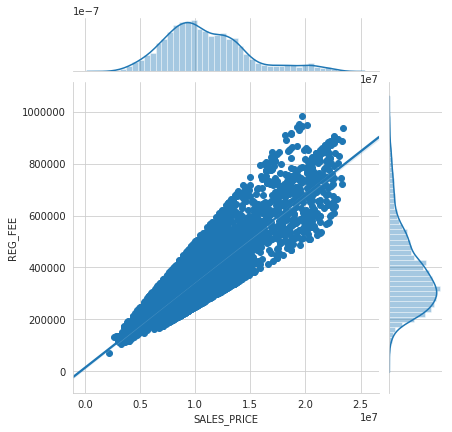

In [338]:
plot_x_y(train_corrected_df, 'SALES_PRICE', 'REG_FEE')

<Figure size 360x360 with 0 Axes>

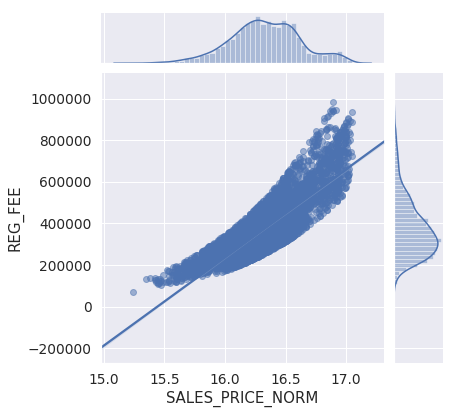

In [1003]:
plot_x_y(train_corrected_df, 'SALES_PRICE_NORM', 'REG_FEE')

<Figure size 360x360 with 0 Axes>

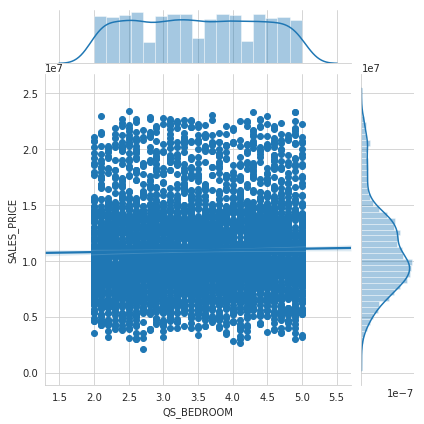

In [335]:
plot_x_y(train_corrected_df, 'QS_BEDROOM', 'SALES_PRICE')

<Figure size 360x360 with 0 Axes>

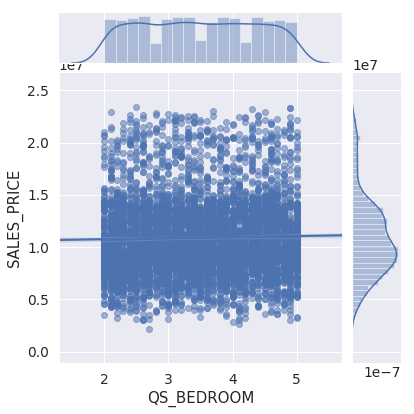

In [523]:
plot_x_y(train_corrected_df, 'QS_BEDROOM', 'SALES_PRICE')

<Figure size 360x360 with 0 Axes>

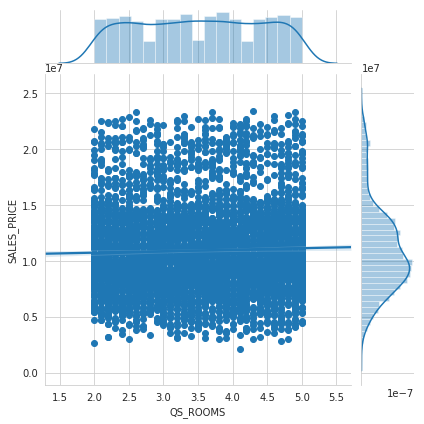

In [334]:
plot_x_y(train_corrected_df, 'QS_ROOMS', 'SALES_PRICE')

<Figure size 360x360 with 0 Axes>

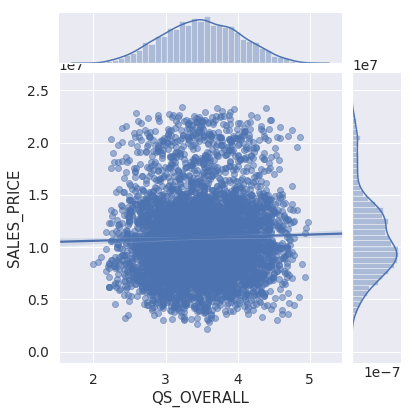

In [457]:
plot_x_y(train_corrected_df, 'QS_OVERALL', 'SALES_PRICE')

<Figure size 360x360 with 0 Axes>

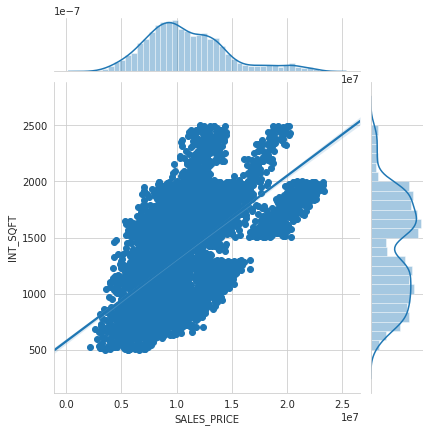

In [337]:
plot_x_y(train_corrected_df, 'SALES_PRICE', 'INT_SQFT')

<Figure size 360x360 with 0 Axes>

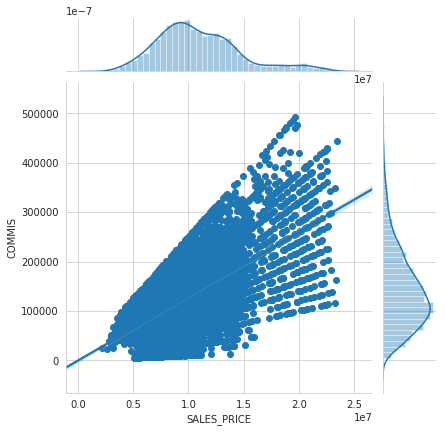

In [341]:
plot_x_y(train_corrected_df, 'SALES_PRICE', 'COMMIS')

<Figure size 360x360 with 0 Axes>

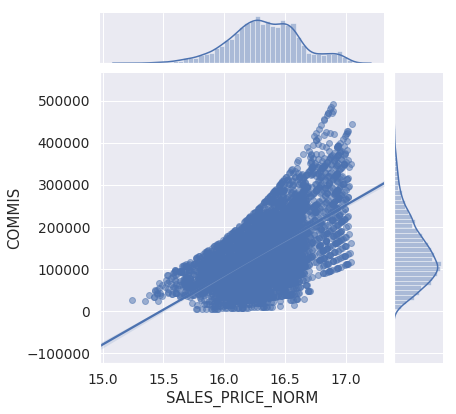

In [1005]:
plot_x_y(train_corrected_df, 'SALES_PRICE_NORM', 'COMMIS')

<Figure size 360x360 with 0 Axes>

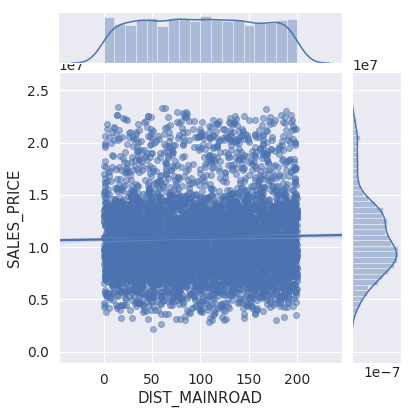

In [1004]:
plot_x_y(train_corrected_df, 'DIST_MAINROAD', 'SALES_PRICE')

<Figure size 360x360 with 0 Axes>

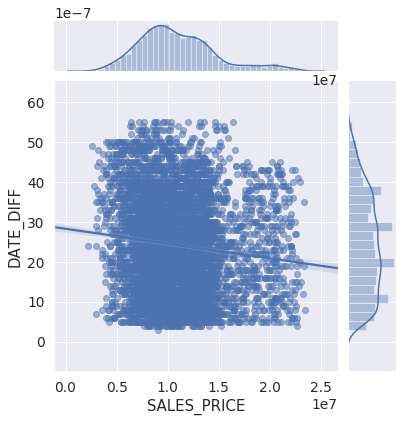

In [705]:
plot_x_y(train_corrected_df, 'SALES_PRICE', 'DATE_DIFF')

### Relationship of SALES_PRICE with NUMERICAL DATA

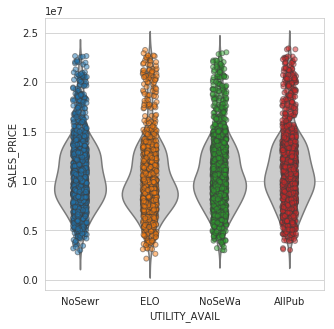

In [372]:
plot_x_y(train_corrected_df, 'UTILITY_AVAIL', 'SALES_PRICE', plot_type = 'b')

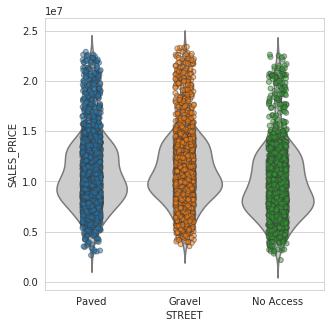

In [373]:
plot_x_y(train_corrected_df, 'STREET', 'SALES_PRICE', plot_type = 'b')

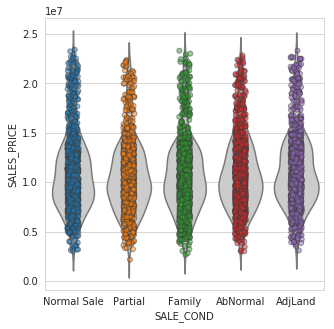

In [374]:
plot_x_y(train_corrected_df, 'SALE_COND', 'SALES_PRICE', plot_type = 'b')

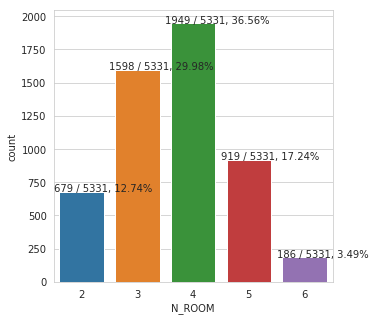

In [375]:
plot_categorical_alone(train_corrected_df, 'N_ROOM')

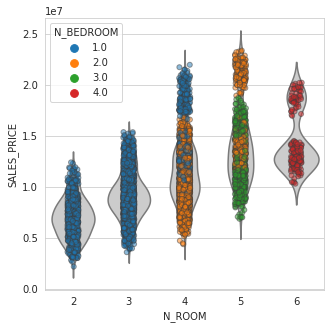

In [376]:
plot_x_y(train_corrected_df, 'N_ROOM', 'SALES_PRICE', plot_type = 'b', z = 'N_BEDROOM')

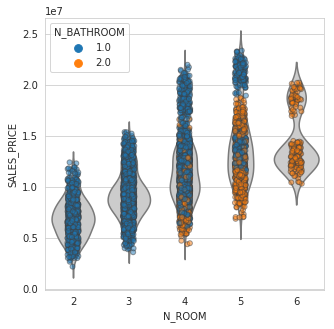

In [377]:
plot_x_y(train_corrected_df, 'N_ROOM', 'SALES_PRICE', plot_type = 'b', z = 'N_BATHROOM')

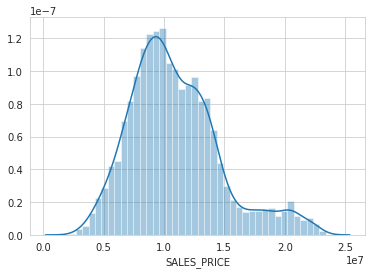

In [380]:
sns.distplot(train_corrected_df['SALES_PRICE'])

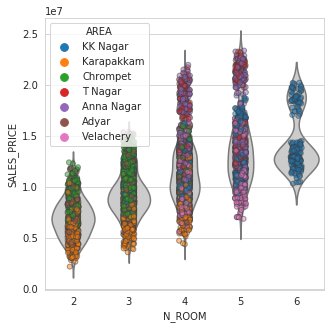

In [378]:
plot_x_y(train_corrected_df, 'N_ROOM', 'SALES_PRICE', plot_type = 'b', z = 'AREA')

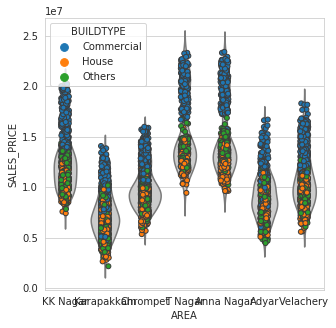

In [387]:
plot_x_y(train_corrected_df, 'AREA', 'SALES_PRICE', plot_type = 'b', z = 'BUILDTYPE', alpha = 1)

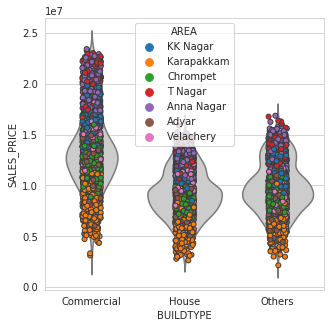

In [406]:
plot_x_y(train_corrected_df, 'BUILDTYPE', 'SALES_PRICE', plot_type = 'b', z = 'AREA', alpha = 1)

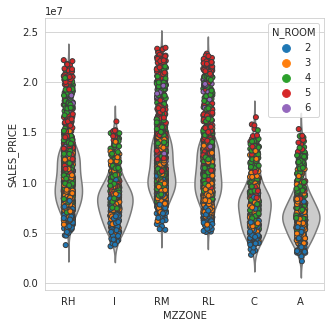

In [404]:
plot_x_y(train_corrected_df, 'MZZONE', 'SALES_PRICE', plot_type = 'b', z = 'N_ROOM', alpha = 1)

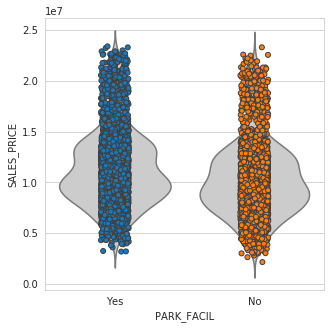

In [403]:
plot_x_y(train_corrected_df, 'PARK_FACIL', 'SALES_PRICE', plot_type = 'b', alpha = 1)

### INFO FROM PLOTS 
- SALES_PRICE is linearly related to REG_FEE
- SALES_PRICE is non-linearly related to INT_SQFT
- SALES_PRICE is near linearly related to COMMIS
- SALES_PRICE is not related to DIST_MAINROAD

- SALES_PRICE seems quite unaffected by UTILITY_AVAIL, STREET, SALE_COND, PARK_FACIL
- SALES_PRICE seems highly unaffected by N_ROOM, AREA, BUILDTYPE, MZZONE
- SALES_PRICE as expected depends on N_ROOMS with 5-room having more price (due to some other **factor??**)
- IN case of 4 rooms, 1 bedroom has higher prices than 2 bedroom
- IN case of 5 rooms, 2 bedroom has higher prices than 3 bedroom and 1 bathroom has higher prices than 2 bathroom.
  So in case of 5 rooms, 2 bedroom and 1 bathroom is in more demand. 
- IN case of 6 rooms, 3 bedroom only present
- As expected N_ROOM and AREA together plays important role
- PARK_FACIL has no relation with N_ROOM, AREA
- AREA does not depend on BUILD_TYPE
- BUILD_TYPE => commercial > others > house

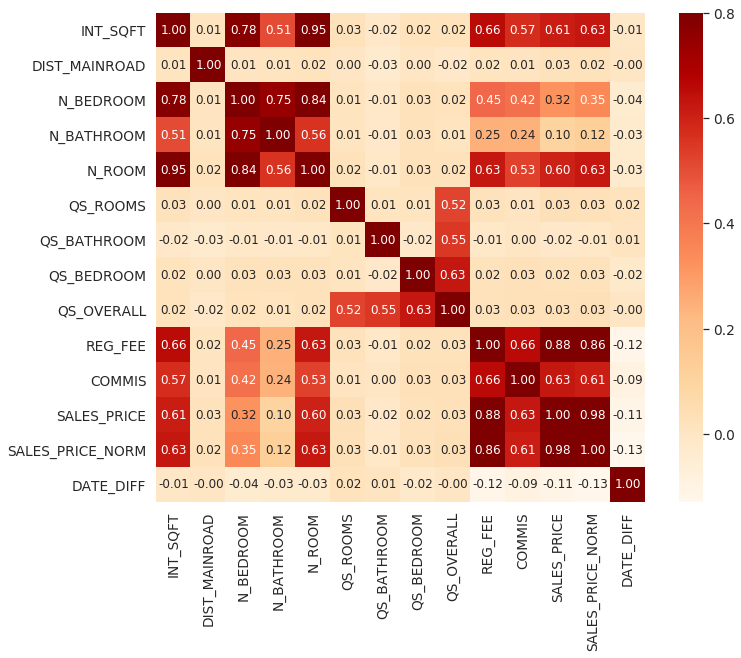

In [708]:
corrmat = train_corrected_df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True, fmt = '.2f', cmap = 'OrRd', annot = True, annot_kws = {"size": 12});

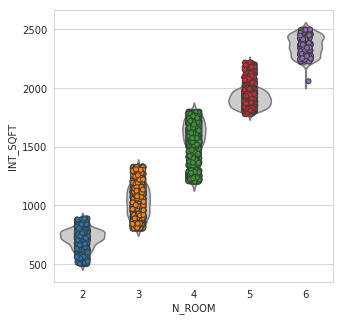

In [427]:
plot_x_y(train_corrected_df, 'N_ROOM', 'INT_SQFT', plot_type = 'b', alpha  = 1)

### If want to build very simple model with less no of features, then the most probable choices are 
- INT_SQFT
- REG_FEE
- COMMIS
- N_ROOM
- AREA

### INFO FROM PLOTS 
- INT_SQFT highly correlated to N_ROOM as it is resaonable.
- SALES_PRICE highly correlated to REG_FEE as seen from plot.

In [448]:
train_corrected_df.dropna().isnull().values.any()

True

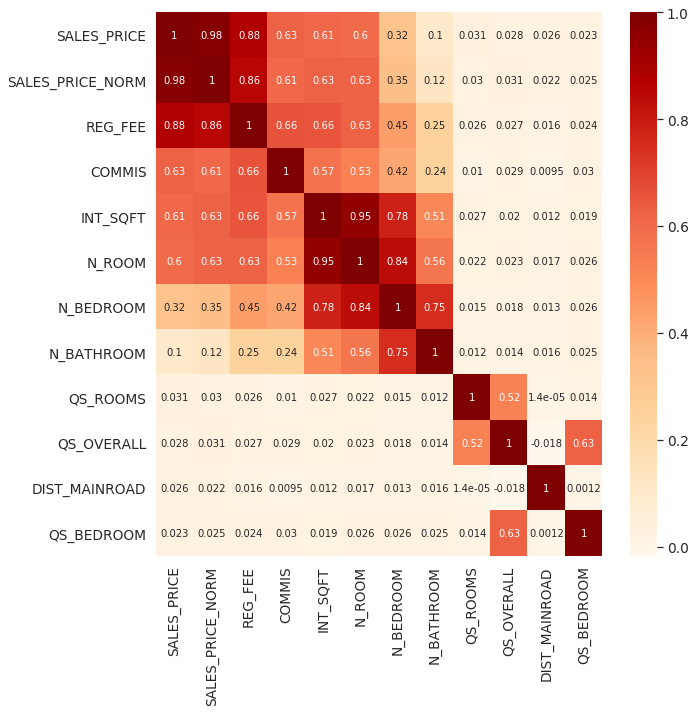

In [581]:
#saleprice correlation matrix
k = 12 #number of variables for heatmap
fig = plt.figure(figsize = (10, 10))
cols = corrmat.nlargest(k, 'SALES_PRICE')['SALES_PRICE'].index
cm = train_corrected_df[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2g',cmap = 'OrRd', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [451]:
ordinal_columns

['QS_BEDROOM',
 'QS_BATHROOM',
 'REG_FEE',
 'SALES_PRICE',
 'QS_ROOMS',
 'COMMIS',
 'INT_SQFT',
 'QS_OVERALL',
 'DIST_MAINROAD']

In [452]:
categorical_columns

['UTILITY_AVAIL',
 'STREET',
 'SALE_COND',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'PARK_FACIL',
 'AREA',
 'BUILDTYPE',
 'MZZONE',
 'DATE_BUILD',
 'DATE_SALE']

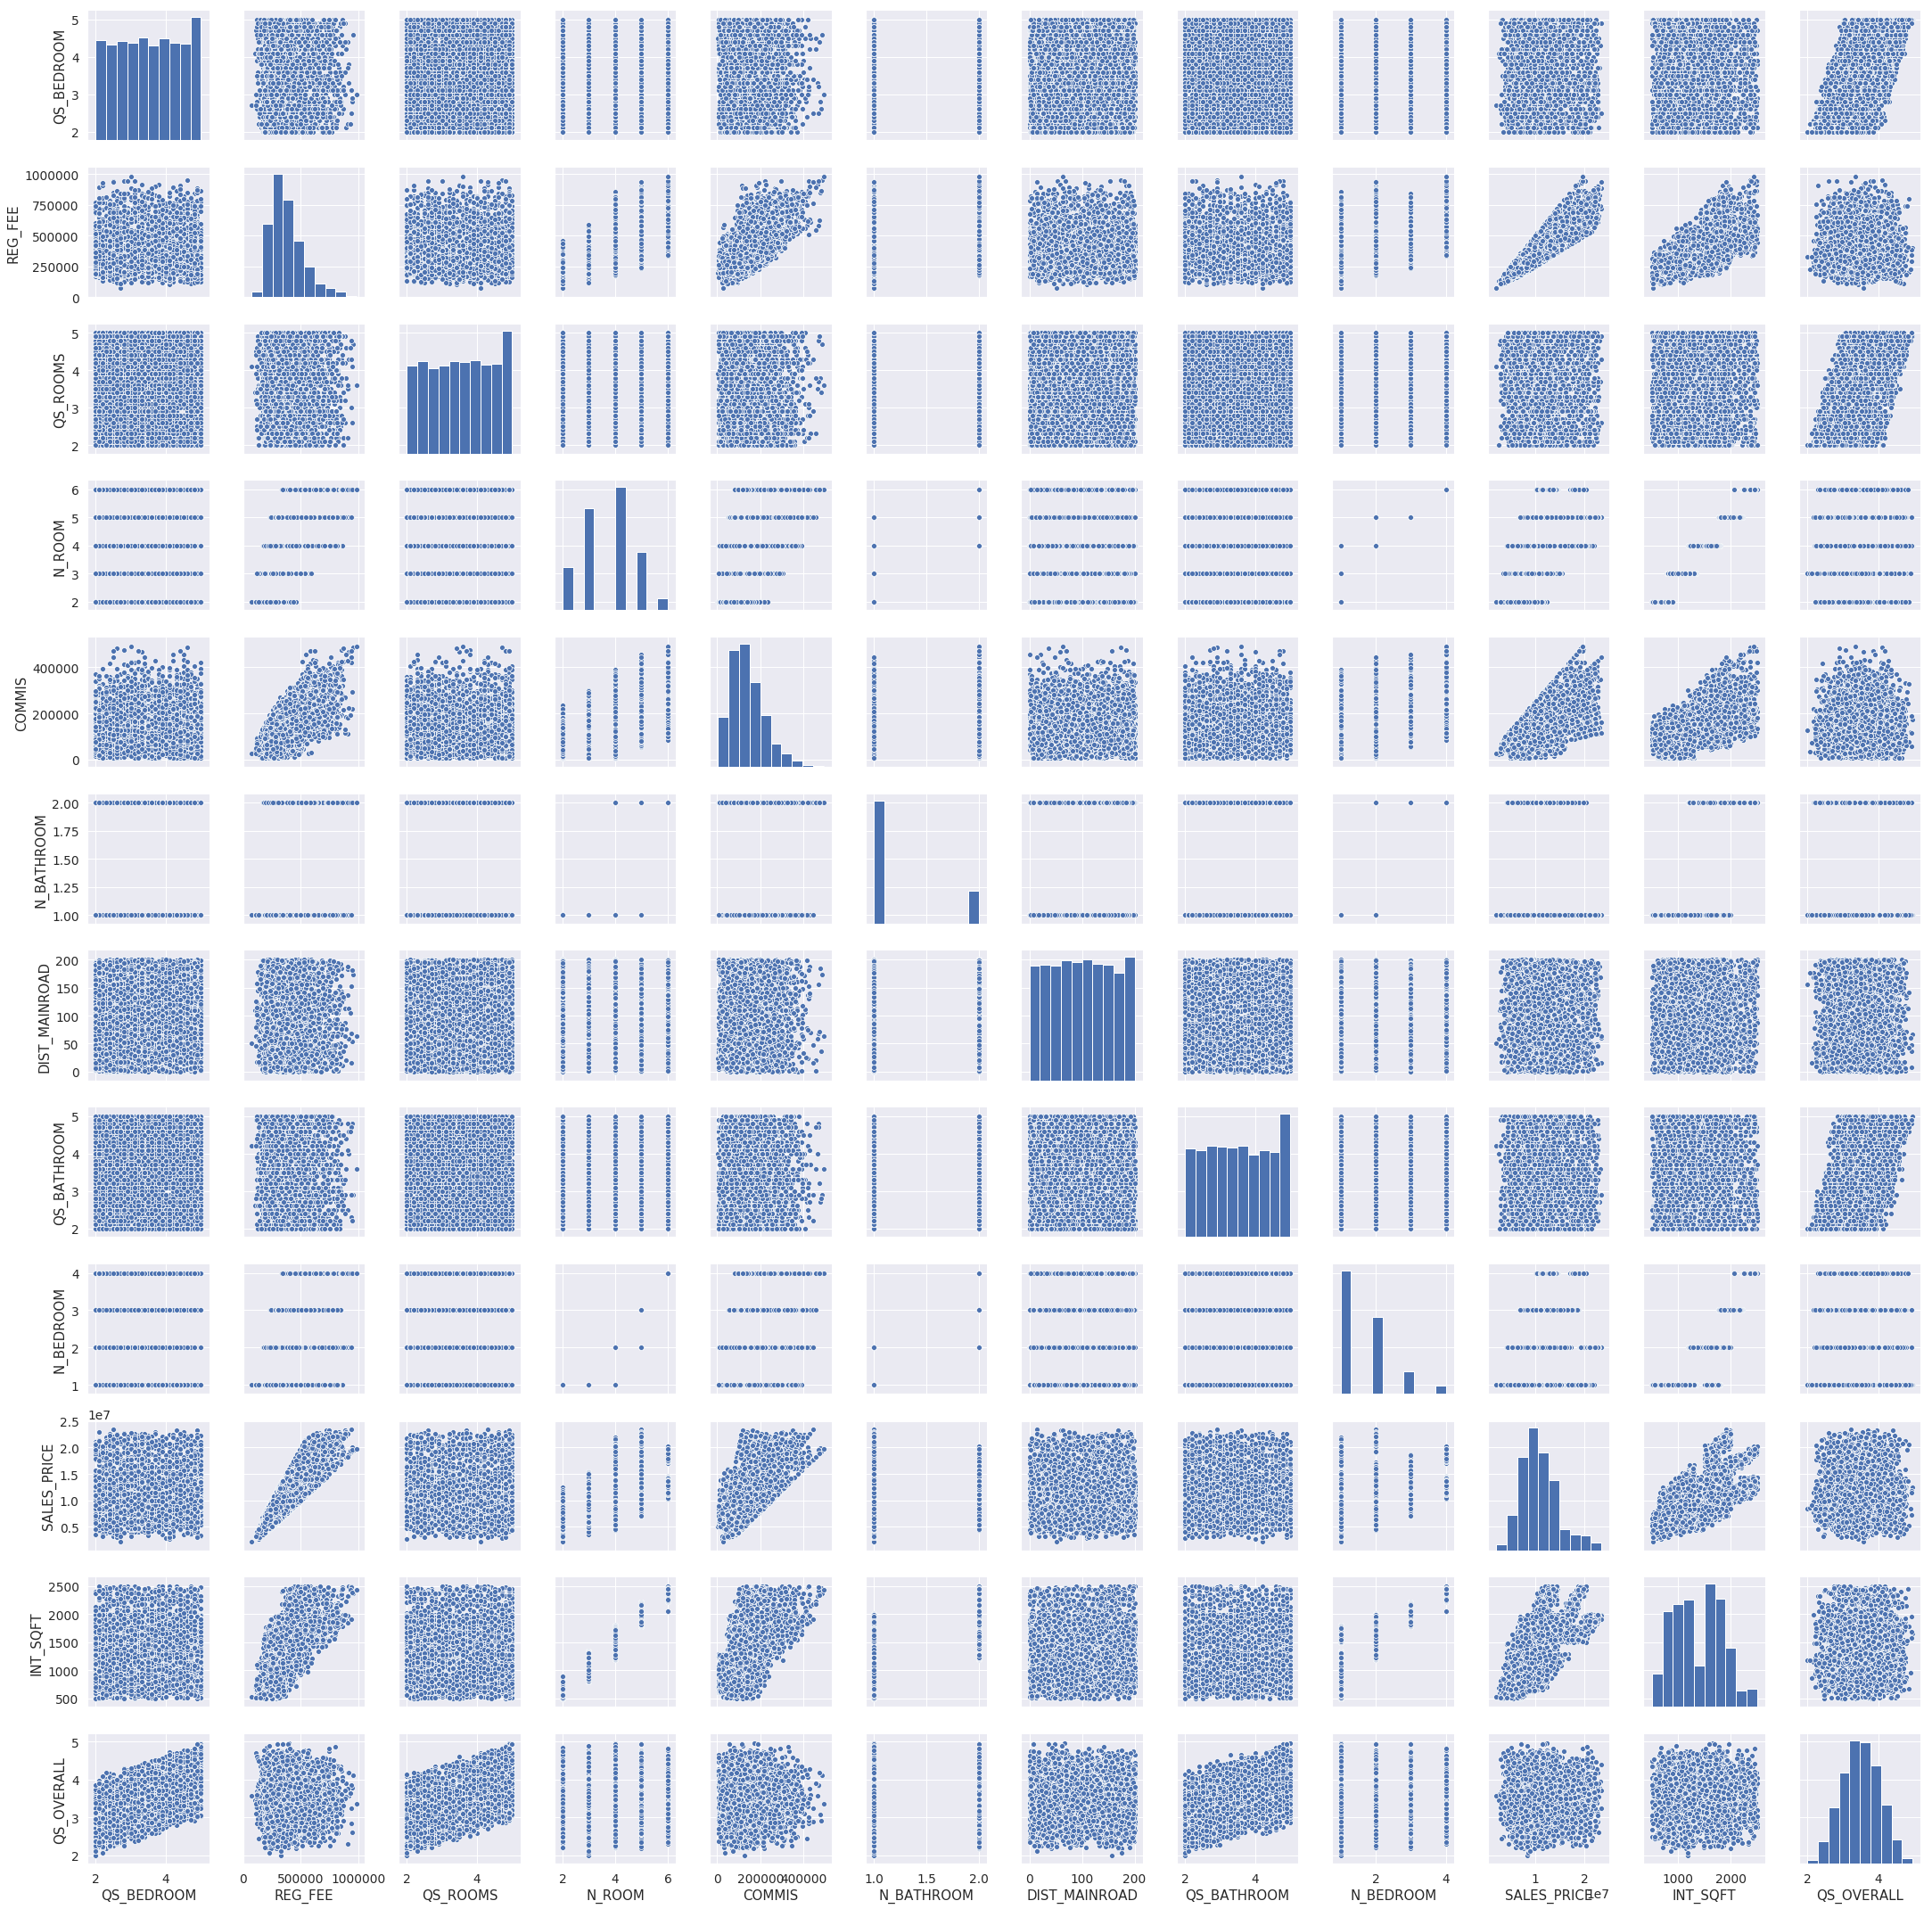

In [456]:
cols = list(set(ordinal_columns + categorical_columns) - set(['DATE_BUILD', 'DATE_SALE']))
sns.pairplot(train_corrected_df.dropna()[cols])
plt.show();

### Feature Engineering

In [672]:
categorical_columns

['UTILITY_AVAIL',
 'STREET',
 'SALE_COND',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'PARK_FACIL',
 'AREA',
 'BUILDTYPE',
 'MZZONE',
 'DATE_BUILD',
 'DATE_SALE']

In [674]:
cols = list(set(categorical_columns) - set(['DATE_BUILD', 'DATE_SALE']))
cols

['UTILITY_AVAIL',
 'N_BEDROOM',
 'STREET',
 'SALE_COND',
 'N_ROOM',
 'PARK_FACIL',
 'AREA',
 'BUILDTYPE',
 'MZZONE',
 'N_BATHROOM']

In [758]:
train_corrected_encoded_df = train_corrected_df.copy(deep = True)
test_corrected_encoded_df = test_corrected_df.copy(deep = True)

In [759]:
train_corrected_encoded_df['N_BEDROOM'] = train_corrected_encoded_df['N_BEDROOM'].apply(lambda x : str(int(x))) 

In [760]:
train_corrected_encoded_df['N_BATHROOM'] = train_corrected_encoded_df['N_BATHROOM'].apply(lambda x : str(int(x)))

In [761]:
train_corrected_encoded_df['N_ROOM'] = train_corrected_encoded_df['N_ROOM'].apply(lambda x : str(int(x)))

In [762]:
test_corrected_encoded_df['N_BEDROOM'] = test_corrected_encoded_df['N_BEDROOM'].apply(lambda x : str(int(x))) 

In [763]:
test_corrected_encoded_df['N_BATHROOM'] = test_corrected_encoded_df['N_BATHROOM'].apply(lambda x : str(int(x)))

In [764]:
test_corrected_encoded_df['N_ROOM'] = test_corrected_encoded_df['N_ROOM'].apply(lambda x : str(int(x)))

In [769]:
train_corrected_encoded_df[cols].dtypes

UTILITY_AVAIL    int64
N_BEDROOM        int64
STREET           int64
SALE_COND        int64
N_ROOM           int64
PARK_FACIL       int64
AREA             int64
BUILDTYPE        int64
MZZONE           int64
N_BATHROOM       int64
dtype: object

In [768]:
test_corrected_encoded_df[cols].dtypes

UTILITY_AVAIL    int64
N_BEDROOM        int64
STREET           int64
SALE_COND        int64
N_ROOM           int64
PARK_FACIL       int64
AREA             int64
BUILDTYPE        int64
MZZONE           int64
N_BATHROOM       int64
dtype: object

In [767]:
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_corrected_encoded_df[c].values)) 
    train_corrected_encoded_df[c] = lbl.transform(list(train_corrected_encoded_df[c].values))
    test_corrected_encoded_df[c] = lbl.transform(list(test_corrected_encoded_df[c].values))

In [732]:
train_corrected_encoded_df.to_csv('train_corrected_imputed_encoded.csv', index = False)
test_corrected_encoded_df.to_csv('test_corrected_imputed_encoded.csv', index = False)

In [819]:
train_corrected_encoded_dropped_df = train_corrected_encoded_df.drop(columns = ['PRT_ID', 'DATE_SALE', 'DATE_BUILD', 'SALES_PRICE']).copy()
test_corrected_encoded_dropped_df = test_corrected_encoded_df.drop(columns = ['PRT_ID', 'DATE_SALE', 'DATE_BUILD']).copy()

### Skewed Features

In [820]:
train_corrected_encoded_dropped_df.dtypes

AREA                  int64
INT_SQFT              int64
DIST_MAINROAD         int64
N_BEDROOM             int64
N_BATHROOM            int64
N_ROOM                int64
SALE_COND             int64
PARK_FACIL            int64
BUILDTYPE             int64
UTILITY_AVAIL         int64
STREET                int64
MZZONE                int64
QS_ROOMS            float64
QS_BATHROOM         float64
QS_BEDROOM          float64
QS_OVERALL          float64
REG_FEE               int64
COMMIS                int64
SALES_PRICE_NORM    float64
DATE_DIFF             int64
dtype: object

In [821]:
test_corrected_encoded_dropped_df.dtypes

AREA               int64
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND          int64
PARK_FACIL         int64
BUILDTYPE          int64
UTILITY_AVAIL      int64
STREET             int64
MZZONE             int64
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
DATE_DIFF          int64
dtype: object

#### NOTE :: Don't replace ***train_corrected_encoded_df*** with ***train_corrected_encoded_dropped_df***

In [822]:
all_data = pd.concat((train_corrected_encoded_dropped_df, test_corrected_encoded_dropped_df), sort = False, ignore_index = True)
all_data.shape

(7109, 20)

In [823]:
cols = list(set(ordinal_columns + ['SALES_PRICE_NORM']) - set(['SALES_PRICE']))
cols

['QS_BEDROOM',
 'QS_BATHROOM',
 'REG_FEE',
 'QS_ROOMS',
 'COMMIS',
 'SALES_PRICE_NORM',
 'INT_SQFT',
 'QS_OVERALL',
 'DIST_MAINROAD']

In [824]:
len(cols)

9

In [865]:
# Check the skew of all numerical features
skewed_feats = all_data[cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



Skew
REG_FEE           1.037536
COMMIS            0.951455
INT_SQFT          0.131210
DIST_MAINROAD     0.018140
QS_BEDROOM        0.017278
QS_BATHROOM       0.000310
QS_OVERALL       -0.006065
QS_ROOMS         -0.018953
SALES_PRICE_NORM -0.053562

In [869]:
skewed_features = [idx for idx in skewness.index if skewness.loc[idx].values[0] > 0.75]
# skewed_features = [idx for idx in skewness.index]
print("There are {} skewed numerical features to Box Cox transform".format(skewed_features.shape[0]))

from scipy.special import boxcox1p
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train_corrected_encoded_dropped_df[feat] = boxcox1p(train_corrected_encoded_dropped_df[feat], lam)
    test_corrected_encoded_dropped_df[feat] = boxcox1p(test_corrected_encoded_dropped_df[feat], lam)

There are 9 skewed numerical features to Box Cox transform


In [870]:
skewed_features

['REG_FEE', 'COMMIS']

In [871]:
train_corrected_encoded_dropped_df.describe()

AREA     INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM  \
count  5331.000000  5331.000000    5331.000000  5331.000000  5331.000000   
mean      2.951979  1380.416995      99.871131     1.632339     1.208029   
std       1.836655   455.166814      57.585529     0.796967     0.407780   
min       0.000000   500.000000       0.000000     0.000000     0.000000   
25%       2.000000   996.500000      50.000000     1.000000     1.000000   
50%       3.000000  1361.000000     100.000000     1.000000     1.000000   
75%       4.000000  1740.000000     148.000000     2.000000     1.000000   
max       6.000000  2500.000000     200.000000     4.000000     2.000000   

            N_ROOM    SALE_COND   PARK_FACIL    BUILDTYPE  UTILITY_AVAIL  \
count  5331.000000  5331.000000  5331.000000  5331.000000    5331.000000   
mean      1.687676     1.982367     0.502345     1.001501       1.516601   
std       1.011842     1.409985     0.500041     0.812426       1.134425   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000     1.000000     0.000000     0.000000       0.000000   
50%       2.000000     2.000000     1.000000     1.000000       2.000000   
75%       2.000000     3.000000     1.000000     2.000000       3.000000   
max       4.000000     4.000000     1.000000     2.000000       3.000000   

            STREET       MZZONE     QS_ROOMS  QS_BATHROOM   QS_BEDROOM  \
count  5331.000000  5331.000000  5331.000000  5331.000000  5331.000000   
mean      1.008254     3.326205     3.510392     3.500882     3.486775   
std       0.849195     1.497699     0.891307     0.896774     0.887873   
min       0.000000     0.000000     2.000000     2.000000     2.000000   
25%       0.000000     3.000000     2.700000     2.700000     2.700000   
50%       1.000000     4.000000     3.500000     3.500000     3.500000   
75%       2.000000     5.000000     4.300000     4.300000     4.300000   
max       2.000000     5.000000     5.000000     5.000000     5.000000   

        QS_OVERALL      REG_FEE       COMMIS  SALES_PRICE_NORM    DATE_DIFF  
count  5331.000000  5331.000000  5331.000000       5331.000000  5331.000000  
mean      3.499820    38.702978    31.977372         16.332599    24.294504  
std       0.527559     2.492317     3.596157          0.288952    12.297772  
min       2.000000    28.958804    17.292946         15.240274     3.000000  
25%       3.120000    36.950393    29.915275         16.147402    14.000000  
50%       3.500000    38.569016    32.249454         16.329430    23.000000  
75%       3.885000    40.333258    34.447888         16.522668    34.000000  
max       4.970000    46.159964    40.943365         17.050569    55.000000

### Feature Importance (First label encode the respective columns)

In [790]:
from sklearn.ensemble import RandomForestRegressor

Feature ranking:
1. feature REG_FEE (0.766126)
2. feature AREA (0.070525)
3. feature INT_SQFT (0.052725)
4. feature BUILDTYPE (0.029982)
5. feature MZZONE (0.027749)
6. feature N_BEDROOM (0.011678)
7. feature COMMIS (0.010423)
8. feature N_BATHROOM (0.005000)
9. feature SALES_PRICE_NORM (0.003320)
10. feature DIST_MAINROAD (0.003132)
11. feature PARK_FACIL (0.002763)
12. feature QS_BEDROOM (0.002581)
13. feature QS_BATHROOM (0.002573)
14. feature QS_ROOMS (0.002566)
15. feature QS_OVERALL (0.002495)
16. feature N_ROOM (0.002064)
17. feature STREET (0.001737)
18. feature SALE_COND (0.001520)
19. feature UTILITY_AVAIL (0.001040)


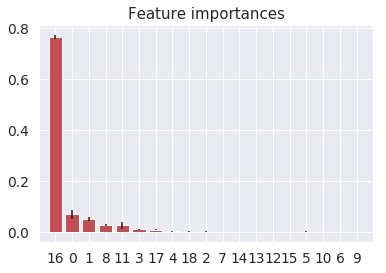

In [812]:
# Build a forest and compute the feature importances
forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

forest.fit(train_corrected_encoded_dropped_df.drop(columns = 'SALES_PRICE_NORM'), train_corrected_encoded_dropped_df['SALES_PRICE_NORM'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

sh = train_corrected_encoded_dropped_df.drop(columns = 'SALES_PRICE_NORM').shape[1]

# Print the feature ranking
print("Feature ranking:")

for f in range(sh):
    print("%d. feature %s (%f)" % (f + 1, train_corrected_encoded_dropped_df.iloc[:,indices[f]].name, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(sh), importances[indices],
       color="r", yerr = std[indices], align="center")
plt.xticks(range(sh), indices)
plt.xlim([-1, sh])
plt.show()

### IMP FEATURES
- REG_FEE
- AREA
- INT_SQFT
- BUILD_TYPE
- MZZONE

In [893]:
train_corrected_encoded_dropped_df['N_BEDROOM'] = train_corrected_encoded_dropped_df['N_BEDROOM'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['N_BATHROOM'] = train_corrected_encoded_dropped_df['N_BATHROOM'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['N_ROOM'] = train_corrected_encoded_dropped_df['N_ROOM'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['SALE_COND'] = train_corrected_encoded_dropped_df['SALE_COND'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['STREET'] = train_corrected_encoded_dropped_df['STREET'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['MZZONE'] = train_corrected_encoded_dropped_df['MZZONE'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['PARK_FACIL'] = train_corrected_encoded_dropped_df['PARK_FACIL'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['SALE_COND'] = train_corrected_encoded_dropped_df['SALE_COND'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['UTILITY_AVAIL'] = train_corrected_encoded_dropped_df['UTILITY_AVAIL'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['BUILDTYPE'] = train_corrected_encoded_dropped_df['BUILDTYPE'].apply(lambda x : str(x))
train_corrected_encoded_dropped_df['AREA'] = train_corrected_encoded_dropped_df['AREA'].apply(lambda x : str(x))

In [908]:
test_corrected_encoded_dropped_df['N_BEDROOM'] = test_corrected_encoded_dropped_df['N_BEDROOM'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['N_BATHROOM'] = test_corrected_encoded_dropped_df['N_BATHROOM'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['N_ROOM'] = test_corrected_encoded_dropped_df['N_ROOM'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['SALE_COND'] = test_corrected_encoded_dropped_df['SALE_COND'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['STREET'] = test_corrected_encoded_dropped_df['STREET'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['MZZONE'] = test_corrected_encoded_dropped_df['MZZONE'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['PARK_FACIL'] = test_corrected_encoded_dropped_df['PARK_FACIL'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['SALE_COND'] = test_corrected_encoded_dropped_df['SALE_COND'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['UTILITY_AVAIL'] = test_corrected_encoded_dropped_df['UTILITY_AVAIL'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['BUILDTYPE'] = test_corrected_encoded_dropped_df['BUILDTYPE'].apply(lambda x : str(x))
test_corrected_encoded_dropped_df['AREA'] = test_corrected_encoded_dropped_df['AREA'].apply(lambda x : str(x))

In [909]:
test_corrected_encoded_dropped_df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE          float64
COMMIS           float64
DATE_DIFF          int64
dtype: object

In [895]:
categorical_columns

['UTILITY_AVAIL',
 'STREET',
 'SALE_COND',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'PARK_FACIL',
 'AREA',
 'BUILDTYPE',
 'MZZONE',
 'DATE_BUILD',
 'DATE_SALE']

In [906]:
X = pd.get_dummies(train_corrected_encoded_dropped_df).drop(columns = 'SALES_PRICE_NORM')
X.shape

(5331, 52)

In [933]:
y = train_corrected_encoded_dropped_df['SALES_PRICE_NORM']

In [910]:
X_test = pd.get_dummies(test_corrected_encoded_dropped_df)
X_test.shape

(1778, 51)

In [913]:
X.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'DATE_DIFF', 'AREA_0', 'AREA_1',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'N_BEDROOM_0',
       'N_BEDROOM_1', 'N_BEDROOM_2', 'N_BEDROOM_3', 'N_BEDROOM_4',
       'N_BATHROOM_0', 'N_BATHROOM_1', 'N_BATHROOM_2', 'N_ROOM_0', 'N_ROOM_1',
       'N_ROOM_2', 'N_ROOM_3', 'N_ROOM_4', 'SALE_COND_0', 'SALE_COND_1',
       'SALE_COND_2', 'SALE_COND_3', 'SALE_COND_4', 'PARK_FACIL_0',
       'PARK_FACIL_1', 'BUILDTYPE_0', 'BUILDTYPE_1', 'BUILDTYPE_2',
       'UTILITY_AVAIL_0', 'UTILITY_AVAIL_1', 'UTILITY_AVAIL_2',
       'UTILITY_AVAIL_3', 'STREET_0', 'STREET_1', 'STREET_2', 'MZZONE_0',
       'MZZONE_1', 'MZZONE_2', 'MZZONE_3', 'MZZONE_4', 'MZZONE_5'],
      dtype='object')

In [926]:
X_test.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'DATE_DIFF', 'AREA_0', 'AREA_1',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'N_BEDROOM_0',
       'N_BEDROOM_1', 'N_BEDROOM_2', 'N_BEDROOM_3', 'N_BEDROOM_4',
       'N_BATHROOM_0', 'N_BATHROOM_1', 'N_BATHROOM_2', 'N_ROOM_0', 'N_ROOM_1',
       'N_ROOM_2', 'N_ROOM_3', 'N_ROOM_4', 'SALE_COND_0', 'SALE_COND_1',
       'SALE_COND_2', 'SALE_COND_3', 'SALE_COND_4', 'PARK_FACIL_0',
       'PARK_FACIL_1', 'BUILDTYPE_0', 'BUILDTYPE_1', 'BUILDTYPE_2',
       'UTILITY_AVAIL_0', 'UTILITY_AVAIL_1', 'UTILITY_AVAIL_2',
       'UTILITY_AVAIL_3', 'STREET_0', 'STREET_1', 'STREET_2', 'MZZONE_0',
       'MZZONE_1', 'MZZONE_2', 'MZZONE_3', 'MZZONE_4', 'MZZONE_5'],
      dtype='object')

####  NOTE :: **X_test** is missing **N_BEDROOM_0** so add that column

In [925]:
X_test.insert(loc = 16, column = 'N_BEDROOM_0', value = 0)

### Models
- Apply XGBoost + Lasso + LightGBM + NN
- add squared predictors

In [930]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [1006]:
#Validation function
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#second scoring metric
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 42).get_n_splits(X.values)
    rmsle = np.sqrt(np.log(-cross_val_score(model, X.values, y,
                                           scoring = 'neg_mean_squared_error',
                                           cv=kf)))
    return(rmsle)

* LASSO Regression :

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [1289]:
kfold = KFold(n_folds, shuffle=True, random_state = 42)

In [1386]:
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter = 1e7, alphas =[0.00005], random_state=42, cv = kfold)).fit(X, y)

In [1434]:
from sklearn.linear_model import LassoCV


alphas = [0.00005, 0.0001, 0.0003, 0.0005, 0.0007, 
          0.0009, 0.01]
alphas2 = [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]

kf = KFold(n_folds, shuffle=True, random_state = 42).get_n_splits(X.values)

lasso_model = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas2, cv = kf,
                                    random_state = 42)).fit(X, y)

In [1435]:
lasso_model.steps[1][1].alpha_

1e-05

In [1436]:
rmse_cv(lasso_model).mean()

0.033288309054082386

* Elastic Net Regression :

again made robust to outliers

In [1388]:
ENet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter = 1e7, alphas = [0.0001], l1_ratio = [.8], random_state = 42, cv = kfold)).fit(X, y)

In [1317]:
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfold, l1_ratio=e_l1ratio))

elastic_model = elastic_cv.fit(X, y)

In [1318]:
elastic_model.steps[1][1].alpha_, elastic_model.steps[1][1].l1_ratio_ 

(0.0001, 0.8)

* Kernel Ridge Regression :

In [1441]:
r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

alphas_alt = [0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.27, 0.28, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55]

KRR = make_pipeline(RobustScaler(), 
                    RidgeCV(alphas = alphas_alt, cv=kfold)
                   ).fit(X, y)

In [1332]:
KRR.steps[1][1].alpha_

0.23

In [1443]:
KRR = KernelRidge(alpha = 0.05, kernel = 'polynomial', degree = 2, coef0 = 30).fit(X, y)

* Gradient Boosting Regression :

With huber loss that makes it robust to outliers

In [1390]:
GBoost = make_pipeline(RobustScaler(),
                       GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5))

GBoost.fit(X, y)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
          ...          presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False))])

* Random Forest Regressor

In [1373]:
from sklearn.ensemble import RandomForestRegressor

In [1374]:
random_forest_regressor = make_pipeline(RobustScaler(),
                                        RandomForestRegressor(n_estimators = 1000, max_depth = 3)
                                       ).fit(X, y)

In [1375]:
score = rmse_cv(random_forest_regressor)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

\Random Forest score: 0.1181 (0.0026)



* XGBoost :

In [1391]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


xgb3 = xgb.XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)

* LightGBM :

In [1392]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11).fit(X, y)

In [1393]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0333 (0.0008)



In [1437]:
score = rmse_cv(lasso_model)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0333 (0.0008)



In [1394]:
score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0333 (0.0008)



In [1444]:
score = rmse_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0070 (0.0002)



In [1372]:
score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0165 (0.0003)



In [1381]:
score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0429 (0.0008)



In [1115]:
score = rmse_cv(xgb3)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0289 (0.0005)



In [1396]:
score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.0290 (0.0008)



In [1445]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        self.models_ = None
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [1459]:
averaged_models1 = AveragingModels(models = (GBoost, KRR, xgb3, model_lgb))
averaged_models1.fit(X, y)
score = rmse_cv(averaged_models1)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0178 (0.0004)



In [1446]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso, xgb3, model_lgb))
averaged_models.fit(X, y)
score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0196 (0.0006)



In [1462]:
pred = np.expm1(averaged_models1.predict(X)) - 2000000

In [1463]:
pred

array([14592684.15288825,  8006730.77451502, 13350452.64365973, ...,
        9340722.5512415 ,  8425244.21991951, 12428159.29706277])

In [1464]:
train_df['SALES_PRICE'].values

array([14804680,  7930750, 13328250, ...,  9726400,  8420300, 12344390])

In [1465]:
mean_squared_error(train_df['SALES_PRICE'].values, pred)

24128184033.31128

In [1466]:
r2_score(train_df['SALES_PRICE'].values, pred)

0.9983115869313238

In [1469]:
averaged_models1.predict(X_test)

array([16.45388164, 16.39642572, 15.83718376, ..., 16.32499783,
       16.08014003, 15.89907511])

In [1470]:
pred = np.expm1(averaged_models1.predict(X_test)) - 2000000
pred

array([11990394.83283239, 11209220.24600605,  5550947.61246093, ...,
       10298621.63720068,  7627555.63122031,  6033051.20949843])

In [1471]:
test_df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P04842  Anna Nagar      1532  20-06-2010            150        1.0   
1  P02216   Velachery      1538  13-11-2011            124        2.0   
2  P01666  Karapakkam       824  28-02-2012             62        1.0   
3  P00220  Anna Nagar      1885  11-09-2014            109        2.0   
4  P09713   Velachery      1727  02-01-2006             65        2.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL   ...     BUILDTYPE UTILITY_AVAIL  \
0         1.0       4   AdjLand        Yes   ...        Others           ELO   
1         1.0       4    Family         No   ...    Commercial        NoSewr   
2         1.0       2   AdjLand        Yes   ...         House        NoSewr   
3         1.0       5   Partial        Yes   ...         House        NoSewr   
4         1.0       4    Family         No   ...         House        NoSewr   

      STREET MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0  No Access     RH      4.5          3.8         2.7       3.605   424039   
1  No Access      C      2.9          4.3         4.8       4.100   411937   
2  No Access      I      3.8          4.5         4.3       4.210   231693   
3      Paved     RL      4.7          4.6         2.4       3.755   337535   
4     Gravel      A      4.3          4.8         4.7       4.650   293672   

   COMMIS  
0   58894  
1  167002  
2   88264  
3  162017  
4  146836  

[5 rows x 21 columns]

In [1472]:
answer = test_df.copy(deep = True)
answer['SALES_PRICE'] = pred

In [1473]:
answer.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P04842  Anna Nagar      1532  20-06-2010            150        1.0   
1  P02216   Velachery      1538  13-11-2011            124        2.0   
2  P01666  Karapakkam       824  28-02-2012             62        1.0   
3  P00220  Anna Nagar      1885  11-09-2014            109        2.0   
4  P09713   Velachery      1727  02-01-2006             65        2.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL      ...      UTILITY_AVAIL  \
0         1.0       4   AdjLand        Yes      ...                ELO   
1         1.0       4    Family         No      ...             NoSewr   
2         1.0       2   AdjLand        Yes      ...             NoSewr   
3         1.0       5   Partial        Yes      ...             NoSewr   
4         1.0       4    Family         No      ...             NoSewr   

      STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0  No Access     RH      4.5         3.8         2.7       3.605   424039   
1  No Access      C      2.9         4.3         4.8       4.100   411937   
2  No Access      I      3.8         4.5         4.3       4.210   231693   
3      Paved     RL      4.7         4.6         2.4       3.755   337535   
4     Gravel      A      4.3         4.8         4.7       4.650   293672   

   COMMIS   SALES_PRICE  
0   58894  1.199039e+07  
1  167002  1.120922e+07  
2   88264  5.550948e+06  
3  162017  1.336086e+07  
4  146836  7.575336e+06  

[5 rows x 22 columns]

In [1474]:
answer.to_csv('answer.csv', index = False)

In [1475]:
answer[['PRT_ID', 'SALES_PRICE']].to_csv('check.csv', index = None)

In [1161]:
from sklearn.metrics import mean_squared_error

In [1491]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

#setup models
ridge = make_pipeline(RobustScaler(), 
                      KernelRidge(alpha=0.05, kernel='polynomial', degree=2, coef0=30))

lasso = make_pipeline(RobustScaler(),
                       Lasso(alpha =0.00005, random_state=1))


elasticnet = make_pipeline(RobustScaler(), 
                            ElasticNet(alpha=0.0001, l1_ratio=.8, random_state=3))

GBoost = make_pipeline(RobustScaler(),
                        GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
                       )

lightgbm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, 
                              min_sum_hessian_in_leaf = 11)

xgboost = xgb.XGBRegressor(learning_rate =0.01, n_estimators=3460, 
                            max_depth=3,min_child_weight=0 ,
                            gamma=0, subsample=0.7,
                            colsample_bytree=0.7,
                            objective= 'reg:linear',nthread=4,
                            scale_pos_weight=1,seed=27, 
                            reg_alpha=0.00006)

#stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, GBoost, 
                                            xgboost, lightgbm), 
                               meta_regressor=xgboost,
                               use_features_in_secondary=True)

#prepare dataframes
stackX = np.array(X.values)
stacky = np.array(y)

In [1492]:
stack_gen

StackingCVRegressor(cv=5,
          meta_regressor=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=0, missing=None, n_estimators=3460,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=0.7),
          refit=True,
          regressors=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('kernelridge', KernelRidge(alpha=0.05, coef0=30, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None))]), Pipeline(mem...0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)),
          shuffle=True, store_train_meta_features=False,
          use_features_in_secondary=True)

In [1493]:
stack_gen_model = stack_gen.fit(stackX, stacky)

In [1479]:
em_preds = ENet.predict(X)
lasso_preds = lasso.predict(X)
ridge_preds = KRR.predict(X)
stack_gen_preds = stack_gen_model.predict(X.values)
xgb_preds = xgb3.predict(X)
lgbm_preds = model_lgb.predict(X)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51'] ['INT_SQFT', 'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'DATE_DIFF', 'AREA_0', 'AREA_1', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'N_BEDROOM_0', 'N_BEDROOM_1', 'N_BEDROOM_2', 'N_BEDROOM_3', 'N_BEDROOM_4', 'N_BATHROOM_0', 'N_BATHROOM_1', 'N_BATHROOM_2', 'N_ROOM_0', 'N_ROOM_1', 'N_ROOM_2', 'N_ROOM_3', 'N_ROOM_4', 'SALE_COND_0', 'SALE_COND_1', 'SALE_COND_2', 'SALE_COND_3', 'SALE_COND_4', 'PARK_FACIL_0', 'PARK_FACIL_1', 'BUILDTYPE_0', 'BUILDTYPE_1', 'BUILDTYPE_2', 'UTILITY_AVAIL_0', 'UTILITY_AVAIL_1', 'UTILITY_AVAIL_2', 'UTILITY_AVAIL_3', 'STREET_0', 'STREET_1', 'STREET_2', 'MZZONE_0', 'MZZONE_1', 'MZZONE_2', 'MZZONE_3', 'MZZONE_4', 'MZZONE_5']
expected f5, f8, f26, f50, f33, f1, f38, f24, f23, f51, f6, f49, f48, f20, f37, f35, f45, f2, f44, f32, f46, f17, f9, f21, f14, f31, f41, f25, f3, f0, f7, f16, f12, f18, f47, f28, f11, f36, f39, f13, f27, f4, f34, f42, f29, f19, f10, f15, f43, f30, f22, f40 in input data
training data did not have the following fields: STREET_0, REG_FEE, PARK_FACIL_1, AREA_4, N_ROOM_2, UTILITY_AVAIL_2, N_ROOM_1, BUILDTYPE_1, MZZONE_5, AREA_1, QS_BATHROOM, UTILITY_AVAIL_3, STREET_1, PARK_FACIL_0, STREET_2, SALE_COND_4, AREA_3, UTILITY_AVAIL_0, SALE_COND_3, MZZONE_0, QS_OVERALL, DATE_DIFF, QS_BEDROOM, SALE_COND_1, AREA_5, N_BEDROOM_1, N_BEDROOM_0, QS_ROOMS, N_BATHROOM_0, N_BEDROOM_2, AREA_0, COMMIS, MZZONE_2, N_ROOM_0, AREA_6, DIST_MAINROAD, N_BEDROOM_4, N_ROOM_3, N_ROOM_4, N_BATHROOM_1, N_BEDROOM_3, AREA_2, SALE_COND_2, UTILITY_AVAIL_1, N_BATHROOM_2, BUILDTYPE_2, MZZONE_1, MZZONE_3, INT_SQFT, MZZONE_4, SALE_COND_0, BUILDTYPE_0

In [1152]:
stack_preds = ((0.2*em_preds) + (0.1*lasso_preds) + (0.1*ridge_preds) + 
               (0.2*xgb_preds) + (0.1*lgbm_preds) + (0.3*stack_gen_preds))

In [1495]:
stack_gen_preds = stack_gen_model.predict(X.values)

In [1497]:
avg_preds = averaged_models1.predict(X)

In [1524]:
stack_preds = ((0.1*avg_preds) + (0.9*stack_gen_preds))

In [1525]:
stack_preds

array([16.63854913, 16.10905017, 16.5441471 , ..., 16.2777562 ,
       16.15889515, 16.4817355 ])

In [1526]:
pred = np.expm1(stack_preds) - 2000000

In [1527]:
np.sqrt(mean_squared_error(train_df['SALES_PRICE'].values, pred))

49842.03623388051

In [1528]:
r2_score(train_df['SALES_PRICE'].values, pred)

0.9998261616378835

In [1243]:
em_preds = ENet.predict(X_test)
lasso_preds = lasso.predict(X_test)
ridge_preds = KRR.predict(X_test)
stack_gen_preds = stack_gen_model.predict(X_test)
xgb_preds = xgb3.predict(X_test)
lgbm_preds = model_lgb.predict(X_test)
avg_preds = averaged_models.predict(X_test)

In [1145]:
stack_preds = ((0.2*em_preds) + (0.1*lasso_preds) + (0.1*ridge_preds) + 
               (0.2*xgb_preds) + (0.1*lgbm_preds) + (0.3*stack_gen_preds))

In [1536]:
stack_gen_preds = stack_gen_model.predict(X_test.values)

In [1537]:
avg_preds = averaged_models1.predict(X_test)

In [1538]:
stack_preds = ((0.1*avg_preds) + (0.9*stack_gen_preds))

In [1539]:
stack_preds

array([16.44245295, 16.38930306, 15.83860977, ..., 16.32260713,
       16.0803708 , 15.86335264])

In [1540]:
pred = np.expm1(stack_preds) - 2000000
pred

array([11831413.07320783, 11115469.74449929,  5561723.05156727, ...,
       10269254.38365267,  7629777.65872001,  5751155.69256068])

In [1541]:
answer1 = test_df.copy(deep = True)
answer1['SALES_PRICE'] = pred

In [1542]:
answer1.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P04842  Anna Nagar      1532  20-06-2010            150        1.0   
1  P02216   Velachery      1538  13-11-2011            124        2.0   
2  P01666  Karapakkam       824  28-02-2012             62        1.0   
3  P00220  Anna Nagar      1885  11-09-2014            109        2.0   
4  P09713   Velachery      1727  02-01-2006             65        2.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL      ...      UTILITY_AVAIL  \
0         1.0       4   AdjLand        Yes      ...                ELO   
1         1.0       4    Family         No      ...             NoSewr   
2         1.0       2   AdjLand        Yes      ...             NoSewr   
3         1.0       5   Partial        Yes      ...             NoSewr   
4         1.0       4    Family         No      ...             NoSewr   

      STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0  No Access     RH      4.5         3.8         2.7       3.605   424039   
1  No Access      C      2.9         4.3         4.8       4.100   411937   
2  No Access      I      3.8         4.5         4.3       4.210   231693   
3      Paved     RL      4.7         4.6         2.4       3.755   337535   
4     Gravel      A      4.3         4.8         4.7       4.650   293672   

   COMMIS   SALES_PRICE  
0   58894  1.183141e+07  
1  167002  1.111547e+07  
2   88264  5.561723e+06  
3  162017  1.355628e+07  
4  146836  7.410219e+06  

[5 rows x 22 columns]

In [1543]:
answer1.to_csv('answer1.csv', index = False)

In [1544]:
answer1[['PRT_ID', 'SALES_PRICE']].to_csv('check1.csv', index = None)